This script imports all of the data needed for the thesis. It proceeds to the cleaning and create a single data frame that contains all the relevant variables.

Most of the script at the beginning was converted as comments.
It was used for the initial import of the data. After the initial import, we did not need it, and used the data frame directly.

In [ ]:
#Library import
import pyarrow as pa
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np
from datetime import datetime
import requests
from io import StringIO
import matplotlib.ticker as mticker
import numpy as np

# **AXS Marine dataset**

First import of the raw data - Bulk carrier transits through the Panama Canal from 01-2019 - 04-2025 -Data source: AXS Marine (AXS Dry)- waypoint filter: Panama Canal.

In [ ]:
## Read commodities_bulk
#commodities_bulk_1 = pd.read_parquet('commodities_bulk_01_01_2019_30_06_22.parquet')
#commodities_bulk_2 = pd.read_parquet('commodities_bulk_01_07_2022_05_04_25.parquet')
#pd.set_option("display.max_columns", None) # Show all colum
#commodities_bulk_1.head(4)

In [ ]:
#Bulk_PA = pd.concat([commodities_bulk_1, commodities_bulk_2], ignore_index=True)

In [ ]:
# Bulk_PA to parquet
#Bulk_PA = Bulk_PA.to_parquet('Bulk_PA.parquet')

# **Fuel dataset**

First import of the raw data - Fuel consumption and distance data of Bulk carriers that transited through the Panama Canal from 01-2019 - 01-2025 -Data source: AIS data

In [ ]:
## Import fuel consumption dataset
#import glob

#file_paths = glob.glob('fuel_*.csv')
#dfs = []

#for file_path in file_paths:
 #   df = pd.read_csv(file_path)
  #  dfs.append(df)

#fuel = pd.concat(dfs, ignore_index=True)

#display(fuel)

In [ ]:
## Change '/' for '-' in discharge_start_date	load_end_date
#fuel['discharge_start_date'] = fuel['discharge_start_date'].str.replace('/', '-')
#fuel['load_end_date'] = fuel['load_end_date'].str.replace('/', '-')
## Discharge date to datetime %Y-%m
## Handle errors during conversion
#for i in range(len(fuel)):
 #   try:
  #      fuel.loc[i, 'discharge_start_date'] = pd.to_datetime(fuel.loc[i, 'discharge_start_date'], format='%Y-%m-%d')
   # except ValueError:
    #    try:  # Try alternative format in the except block
     #       fuel.loc[i, 'discharge_start_date'] = pd.to_datetime(fuel.loc[i, 'discharge_start_date'], format='%d-%m-%Y')
      #  except ValueError:
       #     fuel.loc[i, 'discharge_start_date'] = pd.NaT
## For load_end_date
#for i in range(len(fuel)):
 #   try:
  #      fuel.loc[i, 'load_end_date'] = pd.to_datetime(fuel.loc[i, 'load_end_date'], format='%Y-%m-%d')
  #  except ValueError:
   #     try:  # Try alternative format in the except block
    #        fuel.loc[i, 'load_end_date'] = pd.to_datetime(fuel.loc[i, 'load_end_date'], format='%d-%m-%Y')
     #   except ValueError:
      #      fuel.loc[i, 'load_end_date'] = pd.NaT


#fuel

In [ ]:
# Convert 'discharge_start_date' to datetime, forcing errors to NaT
#fuel['discharge_start_date'] = pd.to_datetime(fuel['discharge_start_date'], errors='coerce')
#fuel['load_end_date'] = pd.to_datetime(fuel['load_end_date'], errors='coerce')
#fuel


In [ ]:
# Fuel to parquet
#fuel= fuel.to_parquet('Fuel_consumption.parquet')

In [ ]:
## Discharge start date to daytime
#fuel['discharge_start_date'] = pd.to_datetime(fuel['discharge_start_date'])

Now both datasets are combined into their respective .parquet files to avoid importing all raw datasets everytime and make further manipulation easier.

## **Fuel consumption dataset**

Upload the fuel consumption and distance dataset

In [ ]:
# Read fuel-consumption parquet
Fuel_consumption = pd.read_parquet('Fuel_consumption.parquet')
Fuel_consumption

,imo,discharge_start_date,load_end_date,me_con_g,ae_con_g,ab_con_g,distance_nm
0,9111151,2020-12-04,2020-11-30,7.919460e+06,8.804252e+05,0.000000e+00,552.550002
1,9296793,2020-09-20,2020-07-29,7.604445e+08,9.145594e+07,3.231290e+07,24828.063319
2,9299109,2020-10-20,2020-08-21,3.342339e+07,3.826684e+07,2.164368e+07,3984.197380
3,9299109,2020-12-06,2020-11-06,8.752261e+07,2.311659e+07,9.029301e+06,3409.487991
4,9300221,2020-09-24,2020-08-13,5.162943e+08,3.017362e+07,5.302657e+06,5579.838898
...,...,...,...,...,...,...,...
12257,9855850,2021-10-01,2021-09-12,3.928013e+08,3.349534e+07,6.750847e+06,4298.064858
12258,9882994,2021-08-13,2021-06-29,3.118361e+08,3.998406e+07,2.776322e+07,4679.061604
12259,9882994,2021-10-15,2021-09-29,1.066991e+08,1.562718e+07,9.422341e+06,1664.718662
12260,9882994,2021-12-06,2021-10-31,4.009691e+08,4.107362e+07,1.518276e+07,6406.435256


In [ ]:
# Create fuel consumption mt column
Fuel_consumption['fuel_consumption_mt'] = (Fuel_consumption['me_con_g'] + Fuel_consumption['ae_con_g'] + Fuel_consumption['ab_con_g'])/ 1000000 # grams to metric tons
Fuel_consumption

,imo,discharge_start_date,load_end_date,me_con_g,ae_con_g,ab_con_g,distance_nm,fuel_consumption_mt
0,9111151,2020-12-04,2020-11-30,7.919460e+06,8.804252e+05,0.000000e+00,552.550002,8.799885
1,9296793,2020-09-20,2020-07-29,7.604445e+08,9.145594e+07,3.231290e+07,24828.063319,884.213356
2,9299109,2020-10-20,2020-08-21,3.342339e+07,3.826684e+07,2.164368e+07,3984.197380,93.333916
3,9299109,2020-12-06,2020-11-06,8.752261e+07,2.311659e+07,9.029301e+06,3409.487991,119.668503
4,9300221,2020-09-24,2020-08-13,5.162943e+08,3.017362e+07,5.302657e+06,5579.838898,551.770592
...,...,...,...,...,...,...,...,...
12257,9855850,2021-10-01,2021-09-12,3.928013e+08,3.349534e+07,6.750847e+06,4298.064858,433.047476
12258,9882994,2021-08-13,2021-06-29,3.118361e+08,3.998406e+07,2.776322e+07,4679.061604,379.583340
12259,9882994,2021-10-15,2021-09-29,1.066991e+08,1.562718e+07,9.422341e+06,1664.718662,131.748616
12260,9882994,2021-12-06,2021-10-31,4.009691e+08,4.107362e+07,1.518276e+07,6406.435256,457.225512


# **Bulk_PA dataset**

Upload the bulk carrier transits dataset

In [ ]:
# Read Bulk_PA from parquet
Bulk_PA_original_data = pd.read_parquet('Bulk_PA.parquet')
# Set pd to see all columns
pd.set_option('display.max_columns', None)
Bulk_PA_original_data

,load_zone,load_country,load_port,load_berth,load_anchorage,load_draft,load_duration,load_full_duration,load_wait_duration,load_full_wait_duration,load_start_date,load_end_date,discharge_zone,discharge_country,discharge_port,discharge_berth,discharge_anchorage,discharge_draft,discharge_duration,discharge_full_duration,discharge_wait_duration,discharge_full_wait_duration,discharge_start_date,discharge_end_date,commodity,commodity_group,charterer,vsl_imo,vsl_dwt,vsl_name,vsl_type,vsl_max_speed,vsl_max_draft,has_part_voy,voy_draft_diff,voy_load_draft_ratio,voy_intake_mt,voy_avg_speed,voy_speed_ratio,voy_top_speed,voy_duration,voy_sea_duration,voy_ais_destination,bunk_duration,bunk_wait_duration,blackout_duration,shipyard_duration,shipyard_wait_duration,previous_zone,previous_port,previous_berth,previous_operation,next_zone,next_port,next_berth,next_operation
0,Antwerp Rotterdam Amsterdam Ghent,Belgium,Antwerp,Zuid Natie Churchilldock Breakbulk Terminal,None,8.1,4679.0,21098.0,0.0,8381.0,2018-09-30 11:59:36,2018-10-03,Far East,Japan,Osaka,Sakurajima Coal/Ore Storage,None,5.3,1951.0,19196.0,924.0,3496.0,2019-03-14,2019-03-16 06:49:49,Bulk Clay,Bulk,None,9488061,12731,DEBBIE,Heavy Lift Cargo Vessel,14.5,8.000,1,2.8,86.2500,9948,12.56,86.62,18.59,240170.0,188000.0,Osaka,0.0,0.0,23738.0,0.0,0.0,Spain Atlantic,Aveiro,Aveiro Multipurpose North Terminal,disch,Far East,Ulsan,Piers 7-9 Ulsan,load
1,East Aussie,Australia,Bell Bay,Bell Bay Berth No 3,None,12.2,12500.0,15197.0,9510.0,9560.0,2018-09-26 03:48:40,2018-10-04,West Coast India,India,Kandla (Deendayal Port),Berths CJ5 - CJ10 Kandla Bulk Terminal,None,7.2,2843.0,4571.0,385.0,606.0,2019-01-10,2019-01-12 22:17:01,Ferro Alloys,Bulk,None,9726023,60629,UNITY FORCE,Bulk Carrier,14.3,12.915,1,5.0,84.3980,46110,12.10,84.62,19.58,156628.0,136204.0,Kandla (Deendayal Port),0.0,0.0,20359.0,0.0,0.0,Far East,Rizhao,West Berths 1-5 Rizhao,disch,South Africa,Coega (Ngqura),Transnet Ngqura Terminal,load
2,Far East,Japan,Wakamatsu,Yawata Works - Steels berths,None,7.4,7380.0,8718.0,2861.0,4935.0,2018-10-15 23:48:34,2018-10-21,East Coast South America,Brazil,Itaqui,Itaqui - Berth 101,None,5.4,4849.0,5421.0,12551.0,12640.0,2019-01-01,2019-01-04 15:27:55,Project Cargo,Project Cargoes,None,9463578,12961,SLOMAN DISCHARGER,Open Hatch Carrier,14.5,8.056,1,2.0,88.1331,10523,10.77,74.28,14.49,116139.0,87287.0,Itaqui,0.0,0.0,14054.0,0.0,0.0,Far East,Kanmon,Tanoura West Wharf,disch,Antwerp Rotterdam Amsterdam Ghent,Antwerp,Churchill Terminal (Nova Natie),load
3,Saint Lawrence,Canada,Sorel,Richardson International Grain Terminal (Sorel),None,10.9,1898.0,1898.0,0.0,0.0,2018-10-23 23:38:53,2018-10-25,Far East,China,Gaogang,Gaogang Multipurpose Terminal,None,6.4,9350.0,9350.0,31932.0,31932.0,2019-01-01,2019-01-08 02:38:45,Soybeans,Grain,None,9288291,32550,FEDERAL SAKURA,Bulk Carrier,14.4,10.670,0,4.5,102.1560,30416,12.07,83.82,15.36,109620.0,66440.0,Taizhou,0.0,0.0,6856.0,0.0,0.0,Saint Lawrence,Montreal,Berth 42 Montreal,disch,South East Asia,Cai Mep,Thi Vai Wood Chips Berths,load
4,West Coast Central America,Mexico,Guaymas,Granel Agricola,None,10.1,3637.0,3637.0,14490.0,14490.0,2018-10-25 22:18:32,2018-10-28,North Coast South America,Venezuela,Puerto Cabello,"MPP / Bulk / Container Berths 28,29,30",None,6.1,30231.0,30231.0,84890.0,84890.0,2019-01-09,2019-01-30 12:28:26,Durum Wheat,Grain,None,9727077,37595,OCEAN FORTUNE,Bulk Carrier,14.7,10.329,0,4.0,95.8466,33830,12.90,87.76,13.48,139090.0,20332.0,Puerto Cabello,0.0,0.0,0.0,0.0,0.0,West Coast South America,Guayaquil,Andipuerto Grain Terminal,disch,USG,Myrtle Grove,Associated Terminals - MGMT - M56.8 & 57.3,load
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14233,USG,USA,Convent,Zen-Noh Grain Terminal Convent,None,0.0,1198.0,NaN,NaN,NaN,2025-03-26 16:49:27,2025-03-27,West Coast South Ame

In [ ]:
# See all the column names
Bulk_PA_original_data.columns

Index(['load_zone', 'load_country', 'load_port', 'load_berth',
       'load_anchorage', 'load_draft', 'load_duration', 'load_full_duration',
       'load_wait_duration', 'load_full_wait_duration', 'load_start_date',
       'load_end_date', 'discharge_zone', 'discharge_country',
       'discharge_port', 'discharge_berth', 'discharge_anchorage',
       'discharge_draft', 'discharge_duration', 'discharge_full_duration',
       'discharge_wait_duration', 'discharge_full_wait_duration',
       'discharge_start_date', 'discharge_end_date', 'commodity',
       'commodity_group', 'charterer', 'vsl_imo', 'vsl_dwt', 'vsl_name',
       'vsl_type', 'vsl_max_speed', 'vsl_max_draft', 'has_part_voy',
       'voy_draft_diff', 'voy_load_draft_ratio', 'voy_intake_mt',
       'voy_avg_speed', 'voy_speed_ratio', 'voy_top_speed', 'voy_duration',
       'voy_sea_duration', 'voy_ais_destination', 'bunk_duration',
       'bunk_wait_duration', 'blackout_duration', 'shipyard_duration',
       'shipyard_wait_dur

In [ ]:
# Create a new dataframe keeping only relevant columns from Bulk_PA_original_data df
Bulk_PA = Bulk_PA_original_data[['load_zone', 'load_country', 'load_port', 'load_draft', 'load_start_date',
                                 'load_end_date', 'discharge_zone', 'discharge_country', 'discharge_port', 'discharge_draft',
                                 'discharge_start_date', 'discharge_end_date', 'commodity', 'commodity_group','vsl_imo',
                                 'vsl_dwt', 'vsl_name','vsl_type', 'vsl_max_speed', 'vsl_max_draft', 'has_part_voy',
                                 'voy_draft_diff', 'voy_load_draft_ratio', 'voy_intake_mt','voy_avg_speed', 'voy_speed_ratio',
                                 'voy_top_speed', 'voy_duration', 'voy_sea_duration', 'voy_ais_destination', 'blackout_duration']]

In [ ]:
# Change column name, vsl_imo to imo
Bulk_PA = Bulk_PA.rename(columns={'vsl_imo': 'imo'})

In [ ]:
# Convert duration from minutes to hours
Bulk_PA['voy_duration'] = Bulk_PA['voy_duration'] / 60
Bulk_PA['voy_sea_duration'] = Bulk_PA['voy_sea_duration'] / 60
Bulk_PA['blackout_duration'] = Bulk_PA['blackout_duration'] / 60

# Rename the variables _h
Bulk_PA = Bulk_PA.rename(columns={'voy_duration': 'voy_duration_h'})
Bulk_PA = Bulk_PA.rename(columns={'voy_sea_duration': 'voy_sea_duration_h'})
Bulk_PA = Bulk_PA.rename(columns={'blackout_duration': 'blackout_duration_h'})

In [ ]:
# Remove duplicates based on imo, load_end_date, and discharge_start_date — keep the first occurrence
Bulk_PA = Bulk_PA.drop_duplicates(subset=['imo', 'load_end_date', 'discharge_start_date'], keep='first').reset_index(drop=True)

print("Duplicates removed. Only one entry per unique (imo, load_end_date, discharge_start_date) remains.")

Duplicates removed. Only one entry per unique (imo, load_end_date, discharge_start_date) remains.


In [ ]:
# Cut data to have 2019-2025 to keep the same time frame for both Bulk and Fuel datasets
# Convert load start date and discharge end date to datetime
Bulk_PA['load_start_date'] = pd.to_datetime(Bulk_PA['load_start_date'], errors='coerce')
Bulk_PA['discharge_end_date'] = pd.to_datetime(Bulk_PA['discharge_end_date'], errors='coerce')
# Filter data
Bulk_PA = Bulk_PA[Bulk_PA['load_start_date'] >= '2019-01-01']
Bulk_PA = Bulk_PA[Bulk_PA['discharge_end_date'] < '2025-01-01']
# Reset index
Bulk_PA = Bulk_PA.reset_index(drop=True)

In [ ]:
Bulk_PA.describe()

,load_draft,load_start_date,load_end_date,discharge_draft,discharge_start_date,discharge_end_date,imo,vsl_dwt,vsl_max_speed,vsl_max_draft,has_part_voy,voy_draft_diff,voy_load_draft_ratio,voy_intake_mt,voy_avg_speed,voy_speed_ratio,voy_top_speed,voy_duration_h,voy_sea_duration_h,blackout_duration_h
count,13005.000000,13005,13005,13005.000000,13005,13005,1.300500e+04,13005.000000,13005.000000,13005.000000,13005.000000,13005.000000,13005.000000,13005.000000,13005.000000,12324.000000,13005.000000,13005.000000,13005.000000,13005.000000
mean,10.965103,2021-09-18 03:12:37.674509824,2021-09-20 23:25:07.266436096,6.650973,2021-10-28 03:42:13.702422272,2021-11-01 22:47:21.256670464,9.599217e+06,50533.674048,13.825084,11.851712,0.330796,4.314130,91.619499,41875.245367,11.912546,81.965338,14.977622,1075.782076,779.583215,21.491744
min,4.300000,2019-01-01 06:07:01,2019-01-03 00:00:00,0.000000,2019-01-11 00:00:00,2019-01-18 00:27:16,1.013688e+06,2769.000000,0.000000,4.528000,0.000000,0.100000,58.130900,1980.000000,5.920000,8.060000,8.620000,39.366667,38.516667,0.000000
25%,10.000000,2020-05-10 19:29:13,2020-05-15 00:00:00,6.200000,2020-06-15 00:00:00,2020-06-19 01:25:06,9.473224e+06,35774.000000,14.000000,10.420000,0.000000,3.400000,86.557700,30221.000000,11.220000,77.380000,13.940000,674.500000,431.433333,0.000000
50%,11.200000,2021-09-18 19:57:49,2021-09-23 00:00:00,6.600000,2021-10-28 00:00:00,2021-11-01 19:44:57,9.624641e+06,55688.000000,14.500000,12.570000,0.000000,4.400000,92.658000,43126.000000,11.890000,82.000000,14.730000,1074.383333,815.400000,0.000000
75%,12.000000,2022-12-20 15:30:15,2022-12-23 00:00:00,7.100000,2023-02-02 00:00:00,2023-02-06 23:15:22,9.743590e+06,63127.000000,14.500000,13.300000,1.000000,5.400000,96.929000,51909.000000,12.580000,86.760000,15.720000,1336.750000,1027.466667,0.000000
max,25.500000,2024-12-10 18:45:18,2024-12-15 00:00:00,12.600000,2024-12-30 00:00:00,2024-12-31 20:34:46,9.992256e+06,208942.000000,114.000000,18.500000,1.000000,21.400000,373.353000,171602.000000,18.720000,130.910000,20.000000,5977.116667,3883.283333,2909.950000
std,1.715457,NaN,NaN,0.900254,NaN,NaN,3.160555e+05,22658.749781,3.671039,1.975294,0.470518,1.525338,8.344814,18662.420766,1.065571,7.131447,1.605077,502.531069,399.387394,88.303183


In [ ]:
Bulk_PA

,load_zone,load_country,load_port,load_draft,load_start_date,load_end_date,discharge_zone,discharge_country,discharge_port,discharge_draft,discharge_start_date,discharge_end_date,commodity,commodity_group,imo,vsl_dwt,vsl_name,vsl_type,vsl_max_speed,vsl_max_draft,has_part_voy,voy_draft_diff,voy_load_draft_ratio,voy_intake_mt,voy_avg_speed,voy_speed_ratio,voy_top_speed,voy_duration_h,voy_sea_duration_h,voy_ais_destination,blackout_duration_h
0,West Coast South America,Peru,Bayovar,12.04,2019-01-03 15:58:12,2019-01-03,USG,USA,Manatee,6.1,2019-01-15,2019-01-21 09:18:49,Phosphate Rock,Fertilizers,9240811,52514,MARIA F,Bulk Carrier,14.5,12.040,0,5.94,100.0000,48967,12.55,86.55,13.49,425.350000,266.933333,Manatee,171.916667
1,USG,USA,Destrehan,12.10,2019-01-03 13:56:58,2019-01-03,West Coast South America,Peru,Callao,7.0,2019-01-17,2019-01-19 23:38:33,Corn,Grain,9605853,56784,GLADIATOR,Bulk Carrier,14.2,12.800,0,5.10,94.5312,49694,12.89,90.77,15.51,393.700000,273.166667,Callao,0.000000
2,West Coast South America,Chile,Puerto Patache,11.80,2019-01-01 17:56:12,2019-01-03,East Coast U.S,USA,New York,6.5,2019-01-21,2019-01-24 00:48:47,Salt,Bulk,9490832,57970,Genco Rhone,Bulk Carrier,14.3,12.950,0,5.30,91.1197,48266,11.16,78.04,13.23,534.883333,390.366667,New York,0.000000
3,North West Africa,Morocco,Casablanca,12.20,2019-01-01 06:07:01,2019-01-03,West Coast Central America,Mexico,Lazaro Cardenas,6.9,2019-01-29,2019-02-02 03:19:16,Phosphate Rock,Fertilizers,9801249,63602,BELNIPPON,Bulk Carrier,14.5,13.418,0,5.30,88.6868,50863,13.13,90.55,15.50,765.200000,575.000000,Lazaro Cardenas,0.000000
4,West Mediterranean,Spain,Barcelona,10.90,2019-01-01 19:39:22,2019-01-04,West Coast Central America,Costa Rica,Caldera (Costa Rica),6.3,2019-01-31,2019-02-02 10:46:45,Clinker,Breakbulk,9692727,55757,AQUAVITA BAY,Bulk Carrier,14.5,12.735,0,4.60,85.5909,42697,11.67,80.48,14.02,759.116667,595.300000,Caldera (Costa Rica),0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13000,USG,USA,Houston,11.80,2024-12-05 16:09:28,2024-12-06,West Coast Central America,Mexico,Manzanillo (Mex),7.0,2024-12-28,2024-12-28 13:26:49,Soybeans,Grain,9781009,64012,ES LEADER,Bulk Carrier,14.5,13.325,0,4.80,88.5554,51972,10.20,70.34,12.76,549.283333,517.200000,Manzanillo (Mex),0.000000
13001,North Coast South America,Colombia,Puerto Drummond,11.50,2024-12-06 00:15:57,2024-12-07,West Coast Central America,Guatemala,Puerto Quetzal,6.5,2024-12-22,2024-12-23 03:31:28,Steam Coal,Coal,9520936,58105,Kristinita,Bulk Carrier,14.2,12.826,0,5.00,89.6616,47903,13.05,91.90,13.01,411.266667,320.900000,Puerto Quetzal,0.000000
13002,West Coast South America,Chile,Patillos,11.60,2024-12-05 08:37:51,2024-12-07,East Coast U.S,USA,Newark,6.3,2024-12-27,2024-12-27 12:26:26,Salt,Bulk,9708978,64012,EGRET RIVER,Bulk Carrier,13.8,13.325,0,5.30,84.8030,49048,11.45,82.97,13.72,531.816667,462.766667,None,0.000000
13003,USG,USA,Ama,10.20,2024-12-09 12:59:37,2024-12-11,West Coast Central America,El Salvador,Acajutla,5.4,2024-12-26,2024-12-31 20:34:46,Corn,Grain,9914008,39962,SAKURA HARMONY,Bulk Carrier,0.0,10.350,0,4.80,97.5845,36494,10.76,NaN,14.22,535.583333,284.600000,Acajutla,0.000000


## **Merge Bulk and Fuel dataframes**

Merge both dataframes by matching the IMO number, the load_end_date and the discharge_start_date in both datasets.

In [ ]:
# Merge the DataFrames using a left join
Bulk_PA = Bulk_PA.merge(
    Fuel_consumption,
    on=['imo', 'load_end_date', 'discharge_start_date'],
    how='left'
)

print("DataFrames merged successfully.")

DataFrames merged successfully.


In [ ]:
# Rename the distance column
Bulk_PA = Bulk_PA.rename(columns={'distance_nm': 'distance'})

In [ ]:
# Calcute the number of missing values for the distance variable for each month
# Count NaN values in 'distance' column
nan_count = Bulk_PA['distance'].isna().sum()

# Print the result
print(f"Number of NaN values in 'distance' column: {nan_count}")

# Create a DataFrame with the missing values
missing_distance_df = Bulk_PA[Bulk_PA['distance'].isna()]

# Group by discharge_start_date and count missing values
missing_by_month = missing_distance_df.groupby(missing_distance_df['discharge_start_date'].dt.to_period('M'))['imo'].count().reset_index()

# Rename columns for clarity
missing_by_month = missing_by_month.rename(columns={'discharge_start_date': 'Month', 'imo': 'Missing_Count'})

# Add a total row
total_row = pd.DataFrame({'Month': ['Total'], 'Missing_Count': [missing_by_month['Missing_Count'].sum()]})
missing_by_month = pd.concat([missing_by_month, total_row], ignore_index=True)

# Display the result
display(missing_by_month)

Number of NaN values in 'distance' column: 785


,Month,Missing_Count
0,2019-01,7
1,2019-02,22
2,2019-03,46
3,2019-04,36
4,2019-05,43
5,2019-06,30
6,2019-07,35
7,2019-08,41
8,2019-09,35
9,2019-10,32


In [ ]:
# Analyse distances that equal to 0
# Count rows where 'distance' is 0
zero_count = Bulk_PA[Bulk_PA['distance'] == 0]['distance'].count()

# Print the result
print(f"Number of rows with distance = 0: {zero_count}")

# Create a DataFrame with the zero distance values
zero_distance_df = Bulk_PA[Bulk_PA['distance'] == 0]

# Group by discharge_start_date and count zero distance values
zero_by_month = zero_distance_df.groupby(zero_distance_df['discharge_start_date'].dt.to_period('M'))['imo'].count().reset_index()

# Rename columns for clarity
zero_by_month = zero_by_month.rename(columns={'discharge_start_date': 'Month', 'imo': 'Zero_Count'})

# Add a total row
total_row = pd.DataFrame({'Month': ['Total'], 'Zero_Count': [zero_by_month['Zero_Count'].sum()]})
zero_by_month = pd.concat([zero_by_month, total_row], ignore_index=True)

# Display the result
display(zero_by_month)

Number of rows with distance = 0: 5


,Month,Zero_Count
0,2020-02,1
1,2021-01,2
2,2021-07,1
3,2023-07,1
4,Total,5


Create a new variable to flag when the distance is an outlier in the Fuel_Consumption dataset

In [ ]:
# Test to validate the expected value of distance based on the variables in Bulk_PA from AXS Marine
# As the distance is extracted from AIS

# Create a proxy for the distance based on the Bulk dataset
Bulk_PA['proxy_distance'] = Bulk_PA['voy_avg_speed'] * Bulk_PA['voy_sea_duration_h']
# Measure the difference between the proxy and the distance
Bulk_PA['distance_difference'] = Bulk_PA['distance'] - Bulk_PA['proxy_distance']

## **Bulk_PA data cleaning**

The variables are analysed. When there are outliers, we analyse if we keep the information as it is or if it needs filtering.

In [ ]:
# Set the code so that we will see all the columns of our data frame
pd.set_option('display.max_columns', None)

First exploration of our dataset

### **Voyage duration and voyage sea duration**

The voyage duration includes the loading and unloading operations. The sea voyage duration only accounts for the sailing portion of the voyage.

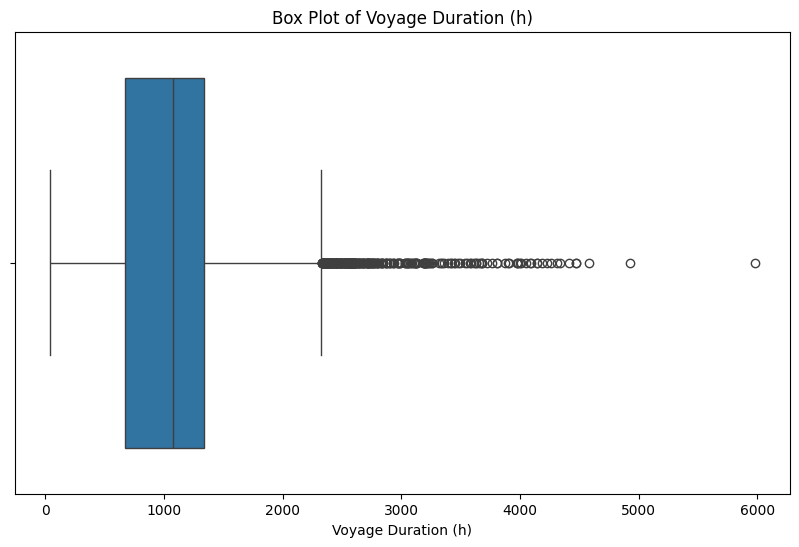

In [ ]:
# Box plot of voyage_sea_duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=Bulk_PA['voy_duration_h'])
plt.title('Box Plot of Voyage Duration (h)')
plt.xlabel('Voyage Duration (h)')
plt.show()

In [ ]:
# Closer look to the extremes of voyage duration time
top_1_percent_voy_duration_h = Bulk_PA[Bulk_PA['voy_duration_h'] < Bulk_PA['voy_duration_h'].quantile(0.01)]
# Sort 'top_1_percent_voy_duration_h' by 'voy_duration_h' in descending order
top_1_percent_voy_duration_h_sorted = top_1_percent_voy_duration_h.sort_values(
    by=['voy_duration_h'], ascending=False
)

# Display the sorted DataFrame
display(top_1_percent_voy_duration_h_sorted)

,load_zone,load_country,load_port,load_draft,load_start_date,load_end_date,discharge_zone,discharge_country,discharge_port,discharge_draft,discharge_start_date,discharge_end_date,commodity,commodity_group,imo,vsl_dwt,vsl_name,vsl_type,vsl_max_speed,vsl_max_draft,has_part_voy,voy_draft_diff,voy_load_draft_ratio,voy_intake_mt,voy_avg_speed,voy_speed_ratio,voy_top_speed,voy_duration_h,voy_sea_duration_h,voy_ais_destination,blackout_duration_h,me_con_g,ae_con_g,ab_con_g,distance,fuel_consumption_mt,proxy_distance,distance_difference
2551,North Coast South America,Colombia,Puerto Nuevo - Colombia,11.6,2020-01-23 18:29:25,2020-01-24,West Coast Central America,Guatemala,Puerto Quetzal,6.20,2020-02-02,2020-02-05 00:08:03,Steam Coal,Coal,9291389,55695,Thor Madoc,Bulk Carrier,14.5,12.502,0,5.40,91.1854,47194,11.85,81.72,13.68,293.650000,145.283333,Puerto Quetzal,0.0,1.350438e+08,8.539727e+06,2.769950e+06,184724.250454,146.353495,1721.607500,183002.642954
1261,North Coast South America,Colombia,Puerto Drummond,12.0,2019-07-16 20:18:56,2019-07-17,West Coast Central America,Guatemala,Puerto Quetzal,6.40,2019-07-26,2019-07-29 01:09:00,Steam Coal,Coal,9675755,61413,SPRING SKY,Bulk Carrier,14.5,13.010,0,5.60,92.2367,54962,12.98,89.52,13.62,292.833333,147.150000,Puerto Quetzal,0.0,1.283925e+08,1.544354e+07,7.307159e+06,1309.980028,151.143210,1910.007000,-600.026972
707,USG,USA,Destrehan,10.2,2019-04-20 16:48:12,2019-04-21,West Coast South America,Colombia,Buenaventura,6.40,2019-05-02,2019-05-02 21:27:45,Corn,Grain,9670420,38737,ALONI,Bulk Carrier,13.7,10.500,0,3.80,97.1429,36873,11.50,83.94,15.60,292.666667,247.400000,Buenaventura,0.0,1.892322e+08,1.203386e+07,4.261277e+06,2023.792017,205.527344,2845.100000,-821.307983
5663,Far East,China,Laizhou,11.8,2021-05-09 09:26:07,2021-05-09,Far East,Korea South,Donghae,6.40,2021-05-21,2021-05-21 12:48:11,Steam Coal,Coal,9303089,56024,PVT SAPPHIRE,Bulk Carrier,14.5,12.570,0,5.40,93.8743,48627,10.89,75.10,20.00,291.366667,290.366667,Donghae,0.0,2.344215e+07,1.111834e+07,8.795087e+06,296.341944,43.355576,3162.093000,-2865.751056
12447,USG,USA,Convent,9.8,2024-08-01 14:58:54,2024-08-02,West Coast South America,Ecuador,Guayaquil,6.30,2024-08-12,2024-08-13 17:36:18,Wheat,Grain,9637131,35997,GOLDENEYE,Bulk Carrier,14.2,10.000,0,3.50,98.0000,30237,10.79,75.99,14.80,290.616667,229.216667,Guayaquil,0.0,1.591949e+08,1.224112e+07,1.593295e+06,2393.359418,173.029333,2473.247833,-79.888415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,Far East,Russia,Vanino,10.1,2021-06-20 22:48:33,2021-06-20,Far East,Korea South,Incheon,6.79,2021-06-28,2021-06-28 08:41:51,Steam Coal,Coal,9303089,56024,PVT SAPPHIRE,Bulk Carrier,14.5,12.570,0,3.31,80.3500,39141,12.07,83.24,20.00,177.883333,176.950000,Incheon,0.0,1.837082e+07,1.161706e+06,1.849581e+05,223.595494,19.717486,2135.786500,-1912.191006
11022,North Coast South America,Colombia,Santa Marta,11.5,2023-06-20 11:54:41,2023-06-20,West Coast Central America,Guatemala,Puerto Quetzal,6.60,2023-06-27,2023-06-27 00:46:52,Steam Coal,Coal,9700354,55869,AYE EVOLUTION,Bulk Carrier,14.5,12.570,0,4.90,91.4877,47098,13.10,90.34,13.51,156.866667,154.000000,Puerto Quetzal,0.0,1.022710e+08,7.940547e+06,2.803373e+06,1365.961117,113.014939,2017.400000,-651.438883
6967,West Coast Central America,Panama,Panama City (Panama),6.7,2021-11-18 10:15:05,2021-11-18,Black Sea,Romania,Tulcea,4.60,2021-11-21,2021-11-21 13:29:23,None,None,7810208,6156,LUCY J,General Cargo Ship,13.5,6.740,0,2.10,99.4065,6103,8.77,64.96,9.74,75.233333,72.383333,Cristobal,0.0,3.117097e+06,1.169711e+06,5.034937e+05,141.004668,4.790302,634.801833,-493.797165
5809,East Coast Central America,Panama,Manzanillo (Pan),6.6,2021-06-02 16:16:36,2021-06-02,Black Sea,Moldova,Giurgiulesti,4.60,2021-06-05,2021-06-05 08:16:42,None,None,7810208,6156,LUCY J,General Cargo Ship,13.5,6.740,0,2.00,97.9229,5969,7.27,53.85,8.62,64.000000,6

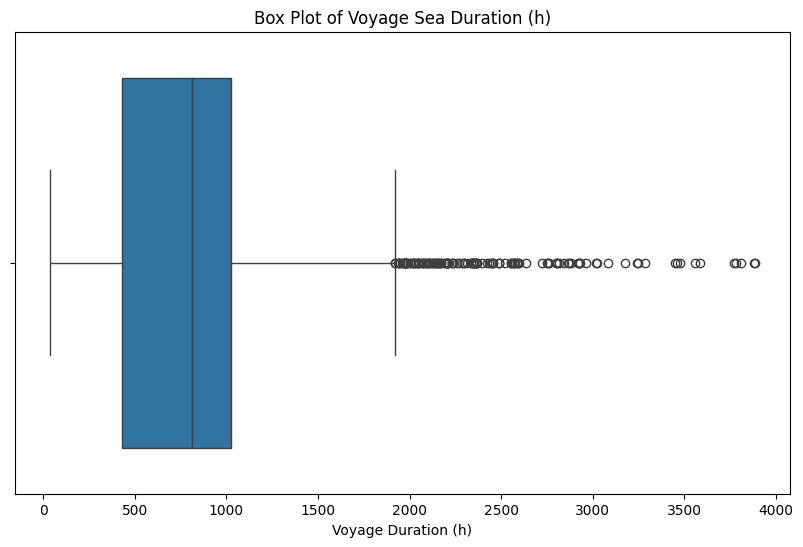

In [ ]:
# Sea voyage duration box plot
# Box plot of voyage_sea_duration_h
plt.figure(figsize=(10, 6))
sns.boxplot(x=Bulk_PA['voy_sea_duration_h'])
plt.title('Box Plot of Voyage Sea Duration (h)')
plt.xlabel('Voyage Duration (h)')
plt.show()

### **Blackout duration**

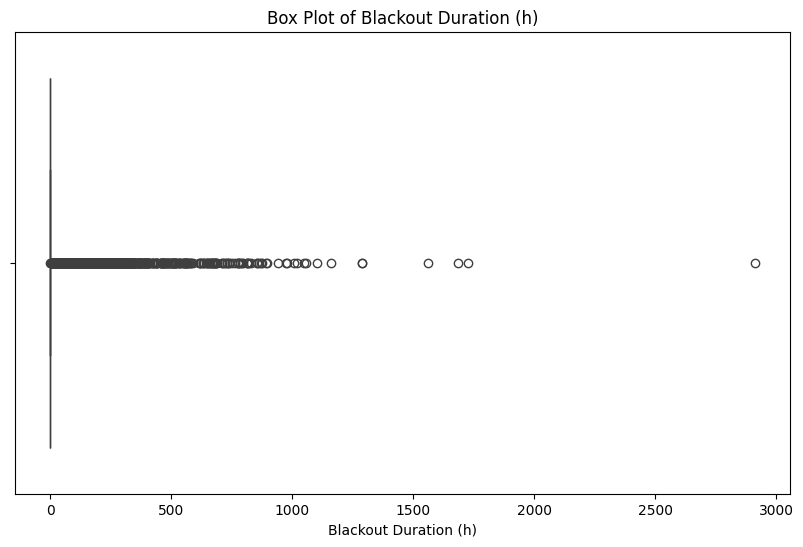

In [ ]:
# Blackout duration box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=Bulk_PA['blackout_duration_h'])
plt.title('Box Plot of Blackout Duration (h)')
plt.xlabel('Blackout Duration (h)')
plt.show()

In [ ]:
# Count rows where 'blackout_duration_h' is greater than 0
blackout_count = Bulk_PA[Bulk_PA['blackout_duration_h'] > 0]['blackout_duration_h'].count()

# Print the blackout_count
print(f"Number of rows with blackout_duration_h > 0: {blackout_count}")

Number of rows with blackout_duration_h > 0: 2556


In [ ]:
# Closer look to the extremes of blackout duration
top_1_percent_blackout_duration_h = Bulk_PA[Bulk_PA['blackout_duration_h'] > Bulk_PA['blackout_duration_h'].quantile(0.99)]
# Sort 'top_1_percent_blackout_duration_h' by 'blackout_duration_h' in descending order
top_1_percent_blackout_duration_h_sorted = top_1_percent_blackout_duration_h.sort_values(
    by=['blackout_duration_h'], ascending=False
)

# Display the sorted DataFrame
display(top_1_percent_blackout_duration_h_sorted)

,load_zone,load_country,load_port,load_draft,load_start_date,load_end_date,discharge_zone,discharge_country,discharge_port,discharge_draft,discharge_start_date,discharge_end_date,commodity,commodity_group,imo,vsl_dwt,vsl_name,vsl_type,vsl_max_speed,vsl_max_draft,has_part_voy,voy_draft_diff,voy_load_draft_ratio,voy_intake_mt,voy_avg_speed,voy_speed_ratio,voy_top_speed,voy_duration_h,voy_sea_duration_h,voy_ais_destination,blackout_duration_h,me_con_g,ae_con_g,ab_con_g,distance,fuel_consumption_mt,proxy_distance,distance_difference
1568,East Coast U.S,USA,Newington,6.43,2019-08-21 15:28:53,2019-08-28,Far East,"Taiwan, Province of China",Kaohsiung,0.0,2020-02-05,2020-02-06 06:43:11,None,None,9415325,7751,SLNC STAR,Heavy Lift Cargo Vessel,15.0,7.150,0,6.43,85.3147,6292,9.60,64.00,13.37,4047.233333,3883.283333,Kaohsiung,2909.950000,1.324918e+04,1.368900e+04,1.122000e+04,0.000000,0.038158,37279.520000,-37279.520000
4739,East Coast South America,Argentina,Rosario,10.00,2020-12-30 00:39:05,2021-01-04,Far East,China,Caofeidian,6.3,2021-05-09,2021-05-12 05:36:13,Corn,Grain,9260158,34656,PRINCE AMIN,Bulk Carrier,14.0,10.650,0,3.70,92.0188,28529,10.43,74.50,13.80,3196.950000,2926.466667,Caofeidian,1725.483333,NaN,NaN,NaN,NaN,NaN,30523.047333,NaN
5911,East Coast South America,Brazil,Cabedelo,11.80,2021-06-16 00:48:43,2021-06-16,Far East,China,Nanjing,6.6,2021-10-30,2021-11-01 06:11:06,None,None,9587879,55660,EQUINOX,Bulk Carrier,14.5,12.868,1,5.20,91.7003,47214,10.83,74.69,19.55,3317.366667,3015.100000,Rizhao,1683.283333,5.038631e+08,5.194218e+07,8.847769e+06,8068.212507,564.653075,32653.533000,-24585.320493
7540,North Coast South America,Venezuela,Jose Terminal,12.10,2022-01-29 21:05:06,2022-02-08,Far East,China,Rizhao,4.8,2022-06-15,2022-06-17 23:37:05,Petroleum Coke,Bulk,9161675,73867,HALLY,Bulk Carrier,0.0,13.870,0,7.30,84.3547,56569,9.03,NaN,12.19,3338.533333,2918.216667,Rizhao,1559.950000,5.098230e+08,1.121702e+08,4.026117e+07,8877.387281,662.254439,26351.496500,-17474.109219
8320,North Coast South America,Venezuela,Jose Terminal,12.00,2022-05-29 23:12:46,2022-05-30,Far East,China,Qinzhou,6.1,2022-09-06,2022-09-08 05:15:25,Petroleum Coke,Bulk,9302815,55809,BAO SHUN,Bulk Carrier,14.6,12.522,0,5.90,94.2341,49662,10.77,73.77,13.02,2430.050000,2364.800000,Qinzhou,1289.150000,5.603860e+08,4.842656e+07,3.742189e+06,9026.784548,612.554746,25468.896000,-16442.111452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7697,East Mediterranean,Turkiye,Tekirdag,11.60,2022-02-23 11:35:26,2022-03-01,Far East,China,Rizhao,6.6,2022-05-15,2022-05-18 08:17:56,Wood Chips,Bulk,9193692,45333,ONE BRIGHT,Bulk Carrier,14.6,11.620,0,5.00,99.8279,42868,12.41,85.00,15.86,2012.716667,1779.233333,Rizhao,457.700000,1.085544e+09,6.273608e+07,3.945040e+06,207909.421432,1152.225238,22080.285667,185829.135765
5239,USG,USA,New Orleans,12.00,2021-03-07 16:28:49,2021-03-12,Far East,Japan,Kashima,6.4,2021-04-18,2021-04-18 23:16:39,Soybeans,Grain,9623881,57981,Melinda,Bulk Carrier,14.3,12.950,0,5.60,92.6641,49657,12.65,88.46,16.50,1014.800000,884.616667,Kashima,453.216667,4.286813e+08,2.170633e+07,3.957005e+06,4378.562088,454.344583,11190.400833,-6811.838745
8358,North Coast South America,Venezuela,Jose Terminal,11.20,2022-06-03 16:31:30,2022-06-03,Far East,China,Nanjing,7.5,2022-08-08,2022-08-11 00:18:30,Petroleum Coke,Bulk,9695224,31777,HUANGHAI STRUGGLER,Open Hatch Carrier,15.0,10.100,0,3.70,107.9210,26693,11.73,78.20,14.50,1639.783333,1514.516667,Nanjing,442.450000,4.828380e+08,8.170042e+07,5.056374e+06,8404.214366,569.594818,17765.280500,-9361.066134
5689,Far East,China,Tianjin,9.00,2021-05-10 08:35:07,2021-05-13,Saint Lawrence,Canada,Grande-Anse Marine Terminal,5.5,2021-07-04,2021-07-09 20:25:20,Copper,Bulk,9346421,11142,SOL SINGAPORE,Open Hatch Carrier,16.0,8.700,0,3.50,103.4480,10992,12.52,78.25,15.86,1451.833333,1250.166667,Canada,442.350000,3.636984e+07,6.54252

The blackout duration is not the most important variable for our analysis and it does not help us identify the outliers. We will focus on voyage sea duration and distance 94.

### **Distance**

Merged data from AIS containting the distance variable has some high extremes. We changed them by calculating a distance proxy using average speed and voyage sea duration, to then switch the top and bottom 6% to that proxy if it was not larger (lower) than these extreme values. The 6% was based on the analysis of the difference between the distance and the proxy distance. In that interval, the difference remained negative for the bottom 6% and positive for the top 6% meaning that the proxy was a better estimate than the AIS distance.
This analysis was performed to avoid deleting too many rows.
Changing the value of the distance was performed to delete outliers while keeping the information from the voyages. The distance was greater then one world tour or close to 0 in some cases, which is not rational.

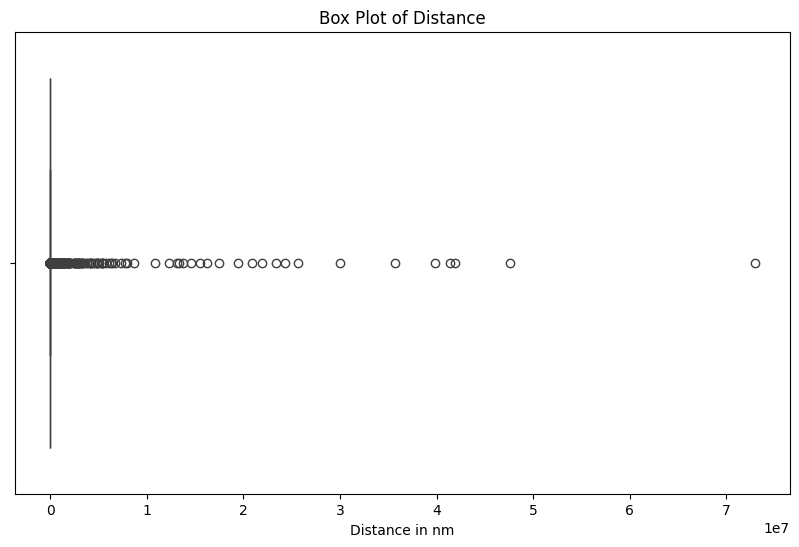

In [ ]:
# Distance box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=Bulk_PA['distance'])
plt.title('Box Plot of Distance')
plt.xlabel('Distance in nm')
plt.show()

In [ ]:
# Closer look to the extremes of distance values
# The 6 % threshold was chosen after testing the values 1 to 10.


top_6_percent_distance = Bulk_PA[Bulk_PA['distance'] > Bulk_PA['distance'].quantile(0.94)]
# Sort 'top_6_percent_distance' by 'distance' in descending order
top_6_percent_distance_sorted = top_6_percent_distance.sort_values(
    by=['distance'], ascending=False)

# Display the sorted DataFrame
display(top_6_percent_distance_sorted)

,load_zone,load_country,load_port,load_draft,load_start_date,load_end_date,discharge_zone,discharge_country,discharge_port,discharge_draft,discharge_start_date,discharge_end_date,commodity,commodity_group,imo,vsl_dwt,vsl_name,vsl_type,vsl_max_speed,vsl_max_draft,has_part_voy,voy_draft_diff,voy_load_draft_ratio,voy_intake_mt,voy_avg_speed,voy_speed_ratio,voy_top_speed,voy_duration_h,voy_sea_duration_h,voy_ais_destination,blackout_duration_h,me_con_g,ae_con_g,ab_con_g,distance,fuel_consumption_mt,proxy_distance,distance_difference
8764,USG,USA,Tampa,10.4,2022-07-31 21:27:15,2022-08-01,West Coast South America,Chile,San Antonio,6.12,2022-09-06,2022-09-08 11:19:28,Phosphates,Fertilizers,9753260,38943,SUMATRA,Bulk Carrier,14.0,10.500,1,4.28,99.0476,36520,11.31,80.79,14.08,925.866667,698.716667,San Antonio,0.000000,2.396452e+08,3.899893e+07,1.918806e+07,7.292819e+07,297.832197,7902.485500,7.292029e+07
4212,East Mediterranean,Turkiye,Icdas,9.9,2020-10-17 20:54:10,2020-10-23,West Coast South America,Peru,Callao,6.20,2020-12-02,2020-12-06 09:58:25,Wire Rod,Steels,9579315,37769,Zafer,Bulk Carrier,0.0,10.630,1,3.70,93.1326,32032,12.17,NaN,18.88,1189.066667,728.050000,Callao,120.666667,3.270665e+08,5.271550e+07,1.517989e+07,4.764749e+07,394.961914,8860.368500,4.763863e+07
5775,North Coast South America,Colombia,Puerto Drummond,13.9,2021-05-26 18:28:05,2021-05-28,West Coast South America,Chile,Huasco,7.50,2021-06-18,2021-06-25 13:27:33,Steam Coal,Coal,9474723,80902,NIKOLAS D,Bulk Carrier,14.0,14.450,0,6.40,94.1176,74891,12.10,86.43,13.23,714.983333,427.366667,Huasco,0.000000,2.073471e+08,3.817909e+07,2.675865e+07,4.191348e+07,272.284790,5171.136667,4.190831e+07
8807,Far East,China,Tianjin,10.8,2022-08-08 04:14:26,2022-08-08,USG,USA,Darrow,7.50,2022-09-23,2022-09-23 00:36:36,Fluorspar,Bulk,9909675,40020,NORSE HOUSTON,Bulk Carrier,0.0,10.800,1,3.30,100.0000,37385,12.07,NaN,16.62,1100.366667,1036.483333,New Orleans,0.000000,2.566080e+08,3.955720e+07,1.808684e+07,4.143707e+07,314.252058,12510.353833,4.142456e+07
5094,USG,USA,Darrow,11.3,2021-02-13 10:39:04,2021-02-21,West Coast South America,Chile,San Antonio,6.40,2021-03-22,2021-03-25 00:37:38,Corn,Grain,9603465,58758,KASPAR SCHULTE,Bulk Carrier,14.5,12.676,0,4.90,89.1448,47721,12.58,86.76,14.72,949.983333,385.116667,San Antonio,0.000000,3.367447e+08,3.433243e+07,1.786374e+07,3.987037e+07,388.940841,4844.767667,3.986553e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,North Coast South America,Colombia,Puerto Bolivar (Colombia),12.1,2019-02-17 08:26:56,2019-02-17,West Coast South America,Chile,Quintero,8.00,2019-03-03,2019-03-09 22:38:53,Steam Coal,Coal,9627760,81930,DARYA DEVI,Bulk Carrier,14.5,14.500,0,4.10,82.7586,63428,11.85,81.72,13.50,494.200000,329.733333,Las Ventanas,0.000000,2.741566e+08,2.521117e+07,5.101715e+06,2.904397e+04,304.469463,3907.340000,2.513663e+04
467,West Coast South America,Peru,Bayovar,12.0,2019-03-13 18:25:28,2019-03-15,USG,USA,Convent,7.90,2019-04-03,2019-04-10 14:32:00,Phosphate Rock,Fertilizers,9268980,75730,OMICRON NIKOS,Bulk Carrier,14.5,13.990,0,4.10,84.3460,57599,11.60,80.00,13.67,668.116667,443.133333,New Orleans,145.016667,1.466609e+08,2.448506e+07,1.036955e+07,2.900361e+04,181.515536,5140.346667,2.386327e+04
10070,North Coast South America,Venezuela,Jose Terminal,11.8,2023-01-24 22:06:21,2023-02-03,Far East,China,Qinzhou,7.40,2023-04-07,2023-04-07 04:55:24,Petroleum Coke,Bulk,9168465,72474,ELLA,Bulk Carrier,14.0,13.520,0,4.40,86.5385,57108,11.78,84.14,13.73,1734.816667,1074.850000,Qinzhou,0.000000,9.789985e+08,1.254893e+08,4.899576e+07,2.894739e+04,1153.483513,12661.733000,1.628566e+04
592,Far East,Japan,Wakamatsu,7.6,2019-03-29 04:39:21,2019-04-03,Saint Lawrence,Canada,Sept-Iles,6.20,2019-06-06,2019-06-14 01:59:21,General Cargo,Bulk,9363534,12776,ROSAIRE A. DESGAGNES,Heavy Lift Cargo Vessel,14.5,8.000,1,1.40,92.5000,10148,13.15,90.69,17.96,18

In [ ]:
# Replace the top and bottom 6% of distance with proxy distance

# Create a new column 'distance_94' and initialize it with NaN
# 'distance_94' is to keep a trace of the change and 94 comes from 100% - 6% threshold to delete outliers.
# In the end, we keep 88% of the original distance variable, and modify 12% to the proxi distance
Bulk_PA['distance_94'] = Bulk_PA['distance']

# Ensure 'distance_94' has a float data type to accommodate potential Proxy_distance values
Bulk_PA['distance_94'] = Bulk_PA['distance'].astype(float)

# Assign values from 'distance' to 'distance_94' for the top & bottom 6% of the values
Bulk_PA.loc[
    (Bulk_PA['distance'] > Bulk_PA['distance'].quantile(0.94)) & (Bulk_PA['distance'] > Bulk_PA['proxy_distance']),
    'distance_94',
] = Bulk_PA['proxy_distance']

Bulk_PA.loc[
    (Bulk_PA['distance'] < Bulk_PA['distance'].quantile(0.06)) & (Bulk_PA['distance'] < Bulk_PA['proxy_distance']),
    'distance_94',
] = Bulk_PA['proxy_distance']

#Add proxy distance when distance is == 0
Bulk_PA.loc[Bulk_PA['distance'] == 0, 'distance_94'] = Bulk_PA['proxy_distance']

#Add proxy distance when distance is == NaN
Bulk_PA.loc[Bulk_PA['distance'].isna(), 'distance_94'] = Bulk_PA['proxy_distance']

display(Bulk_PA)

,load_zone,load_country,load_port,load_draft,load_start_date,load_end_date,discharge_zone,discharge_country,discharge_port,discharge_draft,discharge_start_date,discharge_end_date,commodity,commodity_group,imo,vsl_dwt,vsl_name,vsl_type,vsl_max_speed,vsl_max_draft,has_part_voy,voy_draft_diff,voy_load_draft_ratio,voy_intake_mt,voy_avg_speed,voy_speed_ratio,voy_top_speed,voy_duration_h,voy_sea_duration_h,voy_ais_destination,blackout_duration_h,me_con_g,ae_con_g,ab_con_g,distance,fuel_consumption_mt,proxy_distance,distance_difference,distance_94
0,West Coast South America,Peru,Bayovar,12.04,2019-01-03 15:58:12,2019-01-03,USG,USA,Manatee,6.1,2019-01-15,2019-01-21 09:18:49,Phosphate Rock,Fertilizers,9240811,52514,MARIA F,Bulk Carrier,14.5,12.040,0,5.94,100.0000,48967,12.55,86.55,13.49,425.350000,266.933333,Manatee,171.916667,NaN,NaN,NaN,NaN,NaN,3350.013333,NaN,3350.013333
1,USG,USA,Destrehan,12.10,2019-01-03 13:56:58,2019-01-03,West Coast South America,Peru,Callao,7.0,2019-01-17,2019-01-19 23:38:33,Corn,Grain,9605853,56784,GLADIATOR,Bulk Carrier,14.2,12.800,0,5.10,94.5312,49694,12.89,90.77,15.51,393.700000,273.166667,Callao,0.000000,3.057943e+08,1.392424e+07,4.657263e+06,24506.830910,324.375783,3521.118333,20985.712577,24506.830910
2,West Coast South America,Chile,Puerto Patache,11.80,2019-01-01 17:56:12,2019-01-03,East Coast U.S,USA,New York,6.5,2019-01-21,2019-01-24 00:48:47,Salt,Bulk,9490832,57970,Genco Rhone,Bulk Carrier,14.3,12.950,0,5.30,91.1197,48266,11.16,78.04,13.23,534.883333,390.366667,New York,0.000000,3.771151e+08,2.038345e+07,3.040235e+06,42224.579360,400.538755,4356.492000,37868.087360,4356.492000
3,North West Africa,Morocco,Casablanca,12.20,2019-01-01 06:07:01,2019-01-03,West Coast Central America,Mexico,Lazaro Cardenas,6.9,2019-01-29,2019-02-02 03:19:16,Phosphate Rock,Fertilizers,9801249,63602,BELNIPPON,Bulk Carrier,14.5,13.418,0,5.30,88.6868,50863,13.13,90.55,15.50,765.200000,575.000000,Lazaro Cardenas,0.000000,5.530144e+08,4.796344e+07,1.508180e+07,111108.555800,616.059661,7549.750000,103558.805800,7549.750000
4,West Mediterranean,Spain,Barcelona,10.90,2019-01-01 19:39:22,2019-01-04,West Coast Central America,Costa Rica,Caldera (Costa Rica),6.3,2019-01-31,2019-02-02 10:46:45,Clinker,Breakbulk,9692727,55757,AQUAVITA BAY,Bulk Carrier,14.5,12.735,0,4.60,85.5909,42697,11.67,80.48,14.02,759.116667,595.300000,Caldera (Costa Rica),0.000000,4.471519e+08,2.757838e+07,6.145678e+06,53915.680010,480.875986,6947.151000,46968.529010,6947.151000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13000,USG,USA,Houston,11.80,2024-12-05 16:09:28,2024-12-06,West Coast Central America,Mexico,Manzanillo (Mex),7.0,2024-12-28,2024-12-28 13:26:49,Soybeans,Grain,9781009,64012,ES LEADER,Bulk Carrier,14.5,13.325,0,4.80,88.5554,51972,10.20,70.34,12.76,549.283333,517.200000,Manzanillo (Mex),0.000000,1.813335e+08,3.857328e+07,1.907340e+07,3549.134247,238.980234,5275.440000,-1726.305753,3549.134247
13001,North Coast South America,Colombia,Puerto Drummond,11.50,2024-12-06 00:15:57,2024-12-07,West Coast Central America,Guatemala,Puerto Quetzal,6.5,2024-12-22,2024-12-23 03:31:28,Steam Coal,Coal,9520936,58105,Kristinita,Bulk Carrier,14.2,12.826,0,5.00,89.6616,47903,13.05,91.90,13.01,411.266667,320.900000,Puerto Quetzal,0.000000,1.076169e+08,1.800640e+07,1.118924e+07,1519.804175,136.812582,4187.745000,-2667.940825,1519.804175
13002,West Coast South America,Chile,Patillos,11.60,2024-12-05 08:37:51,2024-12-07,East Coast U.S,USA,Newark,6.3,2024-12-27,2024-12-27 12:26:26,Salt,Bulk,9708978,64012,EGRET RIVER,Bulk Carrier,13.8,13.325,0,5.30,84.8030,49048,11.45,82.97,13.72,531.816667,462.766667,None,0.000000,3.228113e+08,3.536794e+07,1.206342e+07,4262.540254,370.242661,5298.678333,-1036.138079,4262.540254
13003,USG,USA,Ama,10.20,2024-12-09 12:59:37,2024-12-11,West Coast Central America,El Salvador,Acajutla,5.4,2024-12-26,2024-12-31 20:34:46,Corn,Grain

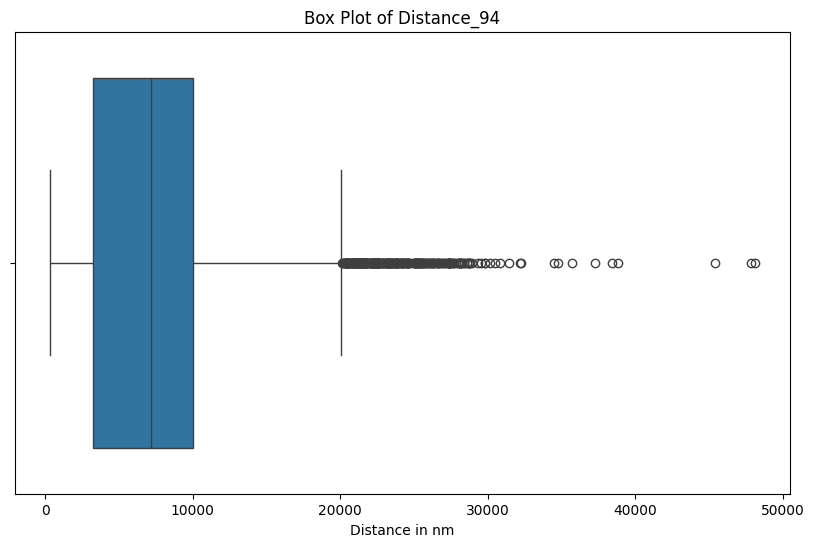

In [ ]:
# Distance_94 box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=Bulk_PA['distance_94'])
plt.title('Box Plot of Distance_94')
plt.xlabel('Distance in nm')
plt.show()

Note that some transits have unexpected values that needs deeper cleaning.
For example, Lucy J vessel has a small distance and a small voy duration which doesn't correspond to a realistic distance and duration between Panama and Romania voyage.
To identify these issues, we will develop a region analysis.

In [ ]:
# Example of problematic transits
display(Bulk_PA[Bulk_PA['vsl_name'] == 'LUCY J'])

,load_zone,load_country,load_port,load_draft,load_start_date,load_end_date,discharge_zone,discharge_country,discharge_port,discharge_draft,discharge_start_date,discharge_end_date,commodity,commodity_group,imo,vsl_dwt,vsl_name,vsl_type,vsl_max_speed,vsl_max_draft,has_part_voy,voy_draft_diff,voy_load_draft_ratio,voy_intake_mt,voy_avg_speed,voy_speed_ratio,voy_top_speed,voy_duration_h,voy_sea_duration_h,voy_ais_destination,blackout_duration_h,me_con_g,ae_con_g,ab_con_g,distance,fuel_consumption_mt,proxy_distance,distance_difference,distance_94
5588,West Coast Central America,Panama,Panama City (Panama),6.7,2021-04-27 18:25:05,2021-04-27,Black Sea,Romania,Constanta,4.6,2021-04-29,2021-04-29 09:47:02,None,None,7810208,6156,LUCY J,General Cargo Ship,13.5,6.74,0,2.1,99.4065,6103,8.66,64.15,9.95,39.366667,38.516667,Constanta,0.0,1.987874e+06,1052484.375,6.615720e+05,94.498604,3.701930,333.554333,-239.055730,333.554333
5809,East Coast Central America,Panama,Manzanillo (Pan),6.6,2021-06-02 16:16:36,2021-06-02,Black Sea,Moldova,Giurgiulesti,4.6,2021-06-05,2021-06-05 08:16:42,None,None,7810208,6156,LUCY J,General Cargo Ship,13.5,6.74,0,2.0,97.9229,5969,7.27,53.85,8.62,64.000000,62.500000,Cristobal,0.0,0.000000e+00,1385028.125,1.770942e+06,0.401666,3.155970,454.375000,-453.973334,454.375000
6967,West Coast Central America,Panama,Panama City (Panama),6.7,2021-11-18 10:15:05,2021-11-18,Black Sea,Romania,Tulcea,4.6,2021-11-21,2021-11-21 13:29:23,None,None,7810208,6156,LUCY J,General Cargo Ship,13.5,6.74,0,2.1,99.4065,6103,8.77,64.96,9.74,75.233333,72.383333,Cristobal,0.0,3.117097e+06,1169711.250,5.034937e+05,141.004668,4.790302,634.801833,-493.797165,634.801833


### **Regions**

Create regions to better estimate the errors in distance and voyage duration.
Note that these regions will be further used to model the number of monthly transits

AXS provides the ports and zones information. We want to flag the outlier distances by making sure the distance between two regions respects what is expected from normal sailing conditions

In [ ]:
# Identify the load zones defined by AXS Marine database
load_zone_counts = Bulk_PA['load_zone'].value_counts().reset_index()
load_zone_counts.columns = ['load_zone', 'count']
load_zone_counts_sorted = load_zone_counts.sort_values(by=['load_zone'])
load_zone_counts_sorted = load_zone_counts_sorted.reset_index(drop=True)
display(load_zone_counts_sorted)

,load_zone,count
0,Antwerp Rotterdam Amsterdam Ghent,145
1,Arabian Gulf,5
2,Baltic,365
3,Black Sea,145
4,Carribbean,62
5,East Africa,2
6,East Aussie,91
7,East Coast Canada,23
8,East Coast Central America,283
9,East Coast India,3


In [ ]:
# Identify the discharge zones defined by AXS Marine database
discharge_zone_counts = Bulk_PA['discharge_zone'].value_counts().reset_index()
discharge_zone_counts.columns = ['discharge_zone', 'count']
discharge_zone_counts_sorted = discharge_zone_counts.sort_values(by=['discharge_zone'])
discharge_zone_counts_sorted = discharge_zone_counts_sorted.reset_index(drop=True)
display(discharge_zone_counts_sorted)

,discharge_zone,count
0,Antwerp Rotterdam Amsterdam Ghent,601
1,Arabian Gulf,5
2,Baltic,116
3,Black Sea,71
4,Carribbean,225
5,East Africa,2
6,East Aussie,21
7,East Coast Canada,10
8,East Coast Central America,439
9,East Coast India,6


In [ ]:
# Define nine broad load zone regions based on the zones from AXS
# Define a function to create binary columns to identify the load zone region
def create_load_zone_column(df, new_column_name, load_zones):
    df[new_column_name] = 0
    df.loc[df['load_zone'].isin(load_zones), new_column_name] = 1
    return df

# Group the load zones to creat broad load zone regions
load_zones_NE_America = ['USG', 'Carribbean', 'East Coast Canada', 'East Coast Central America', 'East Coast U.S', 'Great Lakes', 'Saint Lawrence']
load_zones_NW_America = ['NoPac', 'West Coast Central America']
load_zones_SE_America = ['East Coast South America', 'North Coast South America']
load_zones_SW_America = ['South Pacific', 'West Coast South America']
load_zones_E_Asia = ['South East Asia', 'Far East']
load_zones_W_Asia = ['Arabian Gulf', 'East Coast India', 'West Coast India']
load_zones_Europe_N_Africa = ['Antwerp Rotterdam Amsterdam Ghent', 'Baltic', 'Black Sea', 'East Mediterranean', 'North Continent', 'North West Africa', 'Spain Atlantic', 'United Kingdom Ireland', 'West Mediterranean']
load_zones_Australia = ['East Aussie', 'New Zealand', 'West Aussie']
load_zones_S_Africa = ['South Africa', 'South West Africa', 'East Africa']

# Create the new columns for each load zone region
Bulk_PA = create_load_zone_column(Bulk_PA, 'load_NE_America', load_zones_NE_America)
Bulk_PA = create_load_zone_column(Bulk_PA, 'load_NW_America', load_zones_NW_America)
Bulk_PA = create_load_zone_column(Bulk_PA, 'load_SE_America', load_zones_SE_America)
Bulk_PA = create_load_zone_column(Bulk_PA, 'load_SW_America', load_zones_SW_America)
Bulk_PA = create_load_zone_column(Bulk_PA, 'load_E_Asia', load_zones_E_Asia)
Bulk_PA = create_load_zone_column(Bulk_PA, 'load_W_Asia', load_zones_W_Asia)
Bulk_PA = create_load_zone_column(Bulk_PA, 'load_Europe_N_Africa', load_zones_Europe_N_Africa)
Bulk_PA = create_load_zone_column(Bulk_PA, 'load_Australia', load_zones_Australia)
Bulk_PA = create_load_zone_column(Bulk_PA, 'load_S_Africa', load_zones_S_Africa)


In [ ]:
# Definition of the nine broad discharge zone regions (same as the broad load zone regions)
# Define a function to create binary columns to identify the discharge zone region
def create_discharge_zone_column(df, new_column_name, discharge_zones):
    df[new_column_name] = 0
    df.loc[df['discharge_zone'].isin(discharge_zones), new_column_name] = 1
    return df

# Group the discharge zones to creat broad discharge zone regions
discharge_zones_NE_America = ['USG', 'Carribbean', 'East Coast Canada', 'East Coast Central America', 'East Coast U.S', 'Great Lakes', 'Saint Lawrence']
discharge_zones_NW_America = ['NoPac', 'West Coast Central America']
discharge_zones_SE_America = ['East Coast South America', 'North Coast South America']
discharge_zones_SW_America = ['South Pacific', 'West Coast South America']
discharge_zones_E_Asia = ['South East Asia', 'Far East']
discharge_zones_W_Asia = ['Arabian Gulf', 'East Coast India', 'West Coast India', 'Red Sea']
discharge_zones_Europe_N_Africa = ['Antwerp Rotterdam Amsterdam Ghent', 'Baltic', 'Black Sea', 'East Mediterranean', 'North Continent', 'North West Africa', 'Spain Atlantic', 'United Kingdom Ireland', 'West Mediterranean', 'French Atlantic']
discharge_zones_Australia = ['East Aussie', 'New Zealand', 'West Aussie']
discharge_zones_S_Africa = ['South Africa', 'South West Africa', 'East Africa']

# Create the new columns for each discharge zone region
Bulk_PA = create_discharge_zone_column(Bulk_PA, 'disch_NE_America', discharge_zones_NE_America)
Bulk_PA = create_discharge_zone_column(Bulk_PA, 'disch_NW_America', discharge_zones_NW_America)
Bulk_PA = create_discharge_zone_column(Bulk_PA, 'disch_SE_America', discharge_zones_SE_America)
Bulk_PA = create_discharge_zone_column(Bulk_PA, 'disch_SW_America', discharge_zones_SW_America)
Bulk_PA = create_discharge_zone_column(Bulk_PA, 'disch_E_Asia', discharge_zones_E_Asia)
Bulk_PA = create_discharge_zone_column(Bulk_PA, 'disch_W_Asia', discharge_zones_W_Asia)
Bulk_PA = create_discharge_zone_column(Bulk_PA, 'disch_Europe_N_Africa', discharge_zones_Europe_N_Africa)
Bulk_PA = create_discharge_zone_column(Bulk_PA, 'disch_Australia', discharge_zones_Australia)
Bulk_PA = create_discharge_zone_column(Bulk_PA, 'disch_S_Africa', discharge_zones_S_Africa)


Bulk_PA

,load_zone,load_country,load_port,load_draft,load_start_date,load_end_date,discharge_zone,discharge_country,discharge_port,discharge_draft,discharge_start_date,discharge_end_date,commodity,commodity_group,imo,vsl_dwt,vsl_name,vsl_type,vsl_max_speed,vsl_max_draft,has_part_voy,voy_draft_diff,voy_load_draft_ratio,voy_intake_mt,voy_avg_speed,voy_speed_ratio,voy_top_speed,voy_duration_h,voy_sea_duration_h,voy_ais_destination,blackout_duration_h,me_con_g,ae_con_g,ab_con_g,distance,fuel_consumption_mt,proxy_distance,distance_difference,distance_94,load_NE_America,load_NW_America,load_SE_America,load_SW_America,load_E_Asia,load_W_Asia,load_Europe_N_Africa,load_Australia,load_S_Africa,disch_NE_America,disch_NW_America,disch_SE_America,disch_SW_America,disch_E_Asia,disch_W_Asia,disch_Europe_N_Africa,disch_Australia,disch_S_Africa
0,West Coast South America,Peru,Bayovar,12.04,2019-01-03 15:58:12,2019-01-03,USG,USA,Manatee,6.1,2019-01-15,2019-01-21 09:18:49,Phosphate Rock,Fertilizers,9240811,52514,MARIA F,Bulk Carrier,14.5,12.040,0,5.94,100.0000,48967,12.55,86.55,13.49,425.350000,266.933333,Manatee,171.916667,NaN,NaN,NaN,NaN,NaN,3350.013333,NaN,3350.013333,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,USG,USA,Destrehan,12.10,2019-01-03 13:56:58,2019-01-03,West Coast South America,Peru,Callao,7.0,2019-01-17,2019-01-19 23:38:33,Corn,Grain,9605853,56784,GLADIATOR,Bulk Carrier,14.2,12.800,0,5.10,94.5312,49694,12.89,90.77,15.51,393.700000,273.166667,Callao,0.000000,3.057943e+08,1.392424e+07,4.657263e+06,24506.830910,324.375783,3521.118333,20985.712577,24506.830910,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,West Coast South America,Chile,Puerto Patache,11.80,2019-01-01 17:56:12,2019-01-03,East Coast U.S,USA,New York,6.5,2019-01-21,2019-01-24 00:48:47,Salt,Bulk,9490832,57970,Genco Rhone,Bulk Carrier,14.3,12.950,0,5.30,91.1197,48266,11.16,78.04,13.23,534.883333,390.366667,New York,0.000000,3.771151e+08,2.038345e+07,3.040235e+06,42224.579360,400.538755,4356.492000,37868.087360,4356.492000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,North West Africa,Morocco,Casablanca,12.20,2019-01-01 06:07:01,2019-01-03,West Coast Central America,Mexico,Lazaro Cardenas,6.9,2019-01-29,2019-02-02 03:19:16,Phosphate Rock,Fertilizers,9801249,63602,BELNIPPON,Bulk Carrier,14.5,13.418,0,5.30,88.6868,50863,13.13,90.55,15.50,765.200000,575.000000,Lazaro Cardenas,0.000000,5.530144e+08,4.796344e+07,1.508180e+07,111108.555800,616.059661,7549.750000,103558.805800,7549.750000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,West Mediterranean,Spain,Barcelona,10.90,2019-01-01 19:39:22,2019-01-04,West Coast Central America,Costa Rica,Caldera (Costa Rica),6.3,2019-01-31,2019-02-02 10:46:45,Clinker,Breakbulk,9692727,55757,AQUAVITA BAY,Bulk Carrier,14.5,12.735,0,4.60,85.5909,42697,11.67,80.48,14.02,759.116667,595.300000,Caldera (Costa Rica),0.000000,4.471519e+08,2.757838e+07,6.145678e+06,53915.680010,480.875986,6947.151000,46968.529010,6947.151000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13000,USG,USA,Houston,11.80,2024-12-05 16:09:28,2024-12-06,West Coast Central America,Mexico,Manzanillo (Mex),7.0,2024-12-28,2024-12-28 13:26:49,Soybeans,Grain,9781009,64012,ES LEADER,Bulk Carrier,14.5,13.325,0,4.80,88.5554,51972,10.20,70.34,12.76,549.283333,517.200000,Manzanillo (Mex),0.000000,1.813335e+08,3.857328e+07,1.907340e+07,3549.134247,238.980234,5275.440000,-1726.305753,3549.134247,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13001,North Coast South America,Colombia,Puerto Drummond,11.50,2024-12-06 00:15:57,2024-12-07,West Coast Central America,Guatemala,Puerto Quetzal,6.5,2024-12-22,2024-12-23 03:31:28,Steam Coal,Coal,9520936,58105,Kristinita,Bulk Carrier,14.2,12.826,0,5.00,89.6616,47903,13.05,91.90,13.01,411.266667,320.900000,Puerto Quetzal,0.000000,1.076169e+08,1.800640e+07,1.118924e+07,1519.804175,13

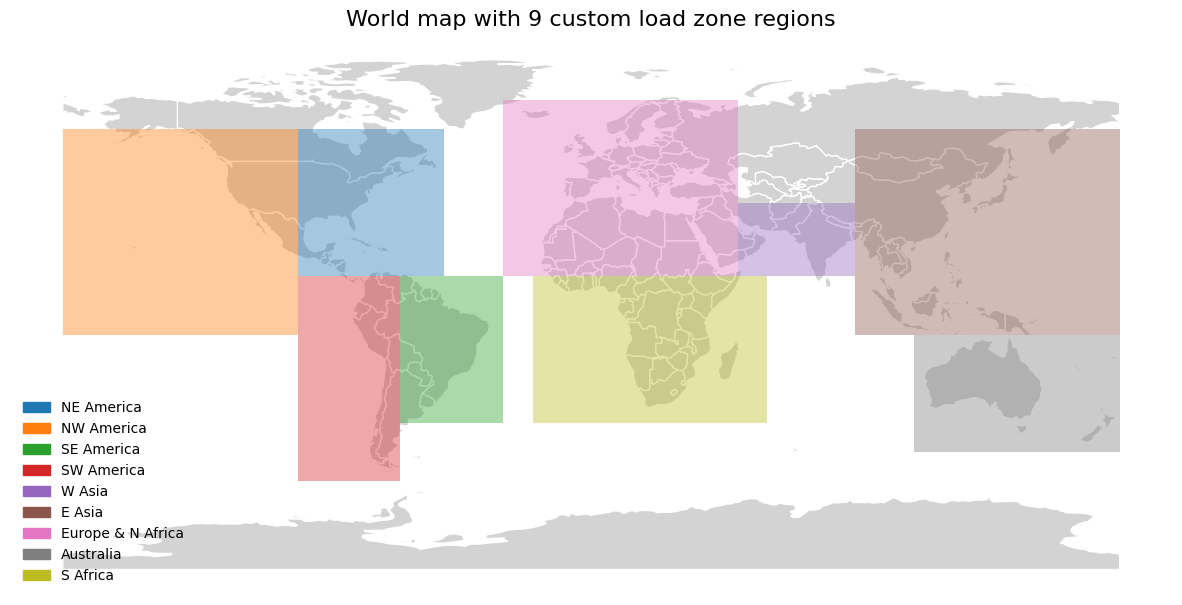

In [ ]:
# Broad illustration of the regions
import matplotlib.pyplot as plt
from shapely.geometry import box
import matplotlib.patches as mpatches
import geopandas as gpd
import requests
import zipfile
import io

#from geopandas_data import natural_earth
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)


# Define approximate bounding boxes for each region
regions = {
    'NE America': box(-100, 10, -50, 60),
    'NW America': box(-180, -10, -100, 60),
    'SE America': box(-65, -40, -30, 10),
    'SW America': box(-100, -60, -65, 10),
    'W Asia': box(50, 10, 90, 35),
    'E Asia': box(90, -10, 180, 60),
    'Europe & N Africa': box(-30, 10, 50, 70),
    'Australia': box(110, -50, 180, -10),
    'S Africa': box(-20, -40, 60, 10),
}

# Choose a color palette
colors = plt.get_cmap('tab10').colors
region_colors = {name: colors[i % len(colors)] for i, name in enumerate(regions)}

# Plot the base world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='white')

# Overlay each region
for name, geom in regions.items():
    gpd.GeoSeries([geom]).plot(ax=ax, color=region_colors[name], alpha=0.4)

# Create legend patches
patches = [mpatches.Patch(color=region_colors[name], label=name) for name in regions]
ax.legend(handles=patches, loc='lower left', fontsize='medium', frameon=False)

# Final styling
ax.set_axis_off()
ax.set_title('World map with 9 custom load zone regions', fontsize=16)
plt.show()

In [ ]:
# Verification: Make sure that each transit is associated with exactly one load region and one discharge region
# Sum of the relevant columns
columns_to_sum = [
    'load_NE_America', 'load_NW_America', 'load_SE_America', 'load_SW_America', 'load_E_Asia',
    'load_W_Asia', 'load_Europe_N_Africa', 'load_Australia', 'load_S_Africa',
    'disch_NE_America', 'disch_NW_America', 'disch_SE_America', 'disch_SW_America', 'disch_E_Asia',
    'disch_W_Asia', 'disch_Europe_N_Africa', 'disch_Australia', 'disch_S_Africa'
]

# Create the 'verification' column by summing the specified columns (has to be equal to 2 for every row)
Bulk_PA['verification'] = Bulk_PA[columns_to_sum].sum(axis=1)

In [ ]:
# Verify that the values are equal to 2
display(Bulk_PA['verification'].describe())

,verification
count,13005.0
mean,2.0
std,0.0
min,2.0
25%,2.0
50%,2.0
75%,2.0
max,2.0


All the zones are associated to one region!

In [ ]:
# Drop the verification column
Bulk_PA = Bulk_PA.drop(columns=['verification'])

In [ ]:
# Distribution of load and discharge regions
# Count the number of transits in each load and discharge regions
columns_to_count = [
    'load_NE_America', 'load_NW_America', 'load_SE_America', 'load_SW_America', 'load_E_Asia',
    'load_W_Asia', 'load_Europe_N_Africa', 'load_Australia', 'load_S_Africa',
    'disch_NE_America', 'disch_NW_America', 'disch_SE_America', 'disch_SW_America', 'disch_E_Asia',
    'disch_W_Asia', 'disch_Europe_N_Africa', 'disch_Australia', 'disch_S_Africa'
]

# Create a dictionary to store the counts
value_counts = {}

# Loop through the columns and count the occurrences of '1'
for column in columns_to_count:
    value_counts[column] = Bulk_PA[column].sum()

# Print the number of transits of each load and discharge region
for column, count in value_counts.items():
    display(f"Number of '1's in {column}: {count}")

"Number of '1's in load_NE_America: 5201"

"Number of '1's in load_NW_America: 1708"

"Number of '1's in load_SE_America: 1342"

"Number of '1's in load_SW_America: 1791"

"Number of '1's in load_E_Asia: 1810"

"Number of '1's in load_W_Asia: 14"

"Number of '1's in load_Europe_N_Africa: 993"

"Number of '1's in load_Australia: 127"

"Number of '1's in load_S_Africa: 19"

"Number of '1's in disch_NE_America: 3633"

"Number of '1's in disch_NW_America: 2000"

"Number of '1's in disch_SE_America: 338"

"Number of '1's in disch_SW_America: 1872"

"Number of '1's in disch_E_Asia: 3572"

"Number of '1's in disch_W_Asia: 16"

"Number of '1's in disch_Europe_N_Africa: 1444"

"Number of '1's in disch_Australia: 97"

"Number of '1's in disch_S_Africa: 33"

In [ ]:
# Define a function to create the OD_region value where the order matters. We make a distinction between load and discharge zones
def get_od_region(row):
    load_regions = [
        'load_NE_America', 'load_NW_America', 'load_SE_America', 'load_SW_America', 'load_E_Asia',
        'load_W_Asia', 'load_Europe_N_Africa', 'load_Australia', 'load_S_Africa'
    ]
    disch_regions = [
        'disch_NE_America', 'disch_NW_America', 'disch_SE_America', 'disch_SW_America', 'disch_E_Asia',
        'disch_W_Asia', 'disch_Europe_N_Africa', 'disch_Australia', 'disch_S_Africa'
    ]

    load_region = next((region[5:] for region in load_regions if row[region] == 1), None)
    disch_region = next((region[6:] for region in disch_regions if row[region] == 1), None)

    if load_region and disch_region:
        return f"{load_region}_to_{disch_region}"
    else:
        return None

# Apply the function to create the 'OD_region' column
Bulk_PA['OD_region'] = Bulk_PA.apply(get_od_region, axis=1)

In [ ]:
# Define a function to create the regions_pairs value where the order doesn't matter to have an estimate of the average distance between two regions
# It will help us to flag the outliers
def get_pair_region(row):
    load_regions = [
        'load_NE_America', 'load_NW_America', 'load_SE_America', 'load_SW_America', 'load_E_Asia',
        'load_W_Asia', 'load_Europe_N_Africa', 'load_Australia', 'load_S_Africa'
    ]
    disch_regions = [
        'disch_NE_America', 'disch_NW_America', 'disch_SE_America', 'disch_SW_America', 'disch_E_Asia',
        'disch_W_Asia', 'disch_Europe_N_Africa', 'disch_Australia', 'disch_S_Africa'
    ]

    load_region = next((region[5:] for region in load_regions if row[region] == 1), None)
    disch_region = next((region[6:] for region in disch_regions if row[region] == 1), None)

    if load_region and disch_region:
        # Sort the regions alphabetically
        regions = sorted([load_region, disch_region])
        return f"{regions[0]}-{regions[1]}"
    else:
        return None

# Apply the function to create the 'region_pairs' column
Bulk_PA['region_pairs'] = Bulk_PA.apply(get_pair_region, axis=1)

In [ ]:
# List the unique region pairs

# Count occurrences of each unique value in 'region_pairs'
region_pair_counts = Bulk_PA['region_pairs'].value_counts()

# Calculate the total sum : Number of transits for each region pairs
total_sum = region_pair_counts.sum()

# Display the counts and total sum
print(region_pair_counts)
print(f"\nTotal sum: {total_sum}")

region_pairs
E_Asia-NE_America                  4764
NE_America-SW_America              2293
NE_America-NW_America              1529
Europe_N_Africa-NW_America         1423
Europe_N_Africa-SW_America          873
NW_America-SE_America               699
E_Asia-SE_America                   484
SE_America-SW_America               468
Australia-NE_America                189
E_Asia-Europe_N_Africa               59
NW_America-S_Africa                  36
Australia-Europe_N_Africa            29
Europe_N_Africa-NE_America           22
E_Asia-E_Asia                        15
NE_America-SE_America                14
E_Asia-SW_America                    14
E_Asia-NW_America                    13
Europe_N_Africa-Europe_N_Africa      13
NE_America-W_Asia                     9
E_Asia-W_Asia                         7
E_Asia-S_Africa                       7
NE_America-NE_America                 5
SE_America-SE_America                 5
NW_America-W_Asia                     5
SW_America-SW_America      

As seen above, most of the transits were between East Asia and North East America. The top nine regions pairs contain almost all the transits.

In [ ]:
# Some region pairs have too few observations to be statistically significant - we remove them
# Count occurrences of each unique value in 'region_pairs'
region_pair_counts = Bulk_PA['region_pairs'].value_counts()

# Remove the region pairs with count lower than 100
filtered_region_pairs = region_pair_counts[region_pair_counts > 100].index

# Keep rows in Bulk_PA where 'region_pairs' is in filtered_region_pairs
Bulk_PA = Bulk_PA[Bulk_PA['region_pairs'].isin(filtered_region_pairs)]

# Reset index
Bulk_PA = Bulk_PA.reset_index(drop=True)

In [ ]:
# Remove empty load and discharge regions columns
columns_to_check = [
    'load_NE_America', 'load_NW_America', 'load_SE_America', 'load_SW_America', 'load_E_Asia',
    'load_W_Asia', 'load_Europe_N_Africa', 'load_Australia', 'load_S_Africa',
    'disch_NE_America', 'disch_NW_America', 'disch_SE_America', 'disch_SW_America', 'disch_E_Asia',
    'disch_W_Asia', 'disch_Europe_N_Africa', 'disch_Australia', 'disch_S_Africa'
]

# Loop through the columns and remove if all values are 0
for column in columns_to_check:
    if Bulk_PA[column].sum() == 0:
        Bulk_PA = Bulk_PA.drop(columns=[column])
        print(f"Column '{column}' removed as it contained only 0 values.")


Column 'load_W_Asia' removed as it contained only 0 values.
Column 'load_S_Africa' removed as it contained only 0 values.
Column 'disch_W_Asia' removed as it contained only 0 values.
Column 'disch_S_Africa' removed as it contained only 0 values.


### **Remove outliers based on region pairs**

Remove the outliers by making sure that the origin-destination is coherent with the distance and the voyage duration. We filter the outliers by region pair.

In [ ]:
# Reduce the dataframe to keep only relevant information to identify the outliers
# Create a copy of the relevant columns from Bulk_PA
flagged_outliers = Bulk_PA[['imo', 'load_end_date', 'discharge_start_date', 'voy_sea_duration_h', 'distance', 'distance_94']].copy()

# Get unique region pairs
unique_region_pairs = Bulk_PA['region_pairs'].unique()

# Create binary columns for each region pair
for region_pair in unique_region_pairs:

    flagged_outliers[region_pair] = (Bulk_PA['region_pairs'] == region_pair).astype(int)

# Display the new DataFrame
flagged_outliers

,imo,load_end_date,discharge_start_date,voy_sea_duration_h,distance,distance_94,NE_America-SW_America,Europe_N_Africa-NW_America,E_Asia-NE_America,NW_America-SE_America,SE_America-SW_America,NE_America-NW_America,E_Asia-SE_America,Europe_N_Africa-SW_America,Australia-NE_America
0,9240811,2019-01-03,2019-01-15,266.933333,NaN,3350.013333,1,0,0,0,0,0,0,0,0
1,9605853,2019-01-03,2019-01-17,273.166667,24506.830910,24506.830910,1,0,0,0,0,0,0,0,0
2,9490832,2019-01-03,2019-01-21,390.366667,42224.579360,4356.492000,1,0,0,0,0,0,0,0,0
3,9801249,2019-01-03,2019-01-29,575.000000,111108.555800,7549.750000,0,1,0,0,0,0,0,0,0
4,9692727,2019-01-04,2019-01-31,595.300000,53915.680010,6947.151000,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12717,9781009,2024-12-06,2024-12-28,517.200000,3549.134247,3549.134247,0,0,0,0,0,1,0,0,0
12718,9520936,2024-12-07,2024-12-22,320.900000,1519.804175,1519.804175,0,0,0,1,0,0,0,0,0
12719,9708978,2024-12-07,2024-12-27,462.766667,4262.540254,4262.540254,1,0,0,0,0,0,0,0,0
12720,9914008,2024-12-11,2024-12-26,284.600000,2140.379234,2140.379234,0,0,0,0,0,1,0,0,0


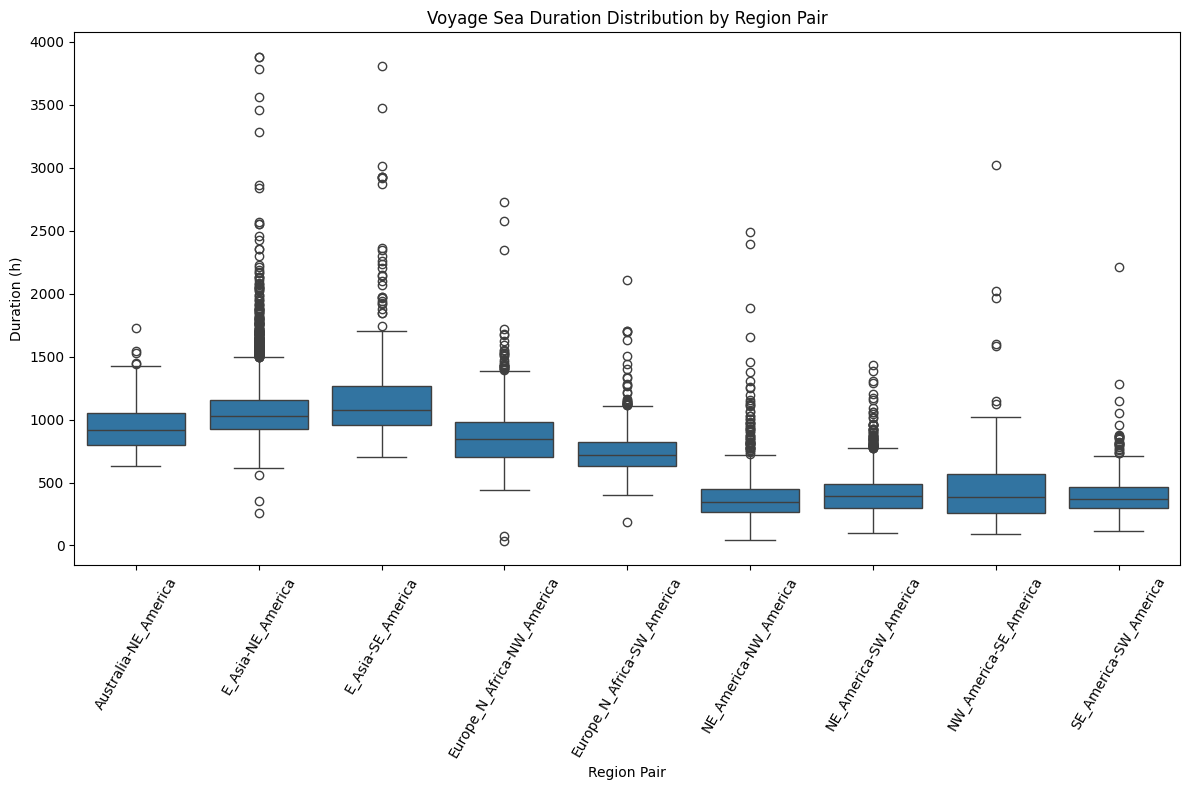

In [ ]:
# Voyage sea duration box plot for each region pair
# Get unique region pairs (excluding the initial columns)
region_pair_columns = flagged_outliers.columns[5:]

# Melt the DataFrame to long format for Seaborn
melted_data = flagged_outliers.melt(
    id_vars=['voy_sea_duration_h'],
    value_vars=region_pair_columns,
    var_name='region_pair',
    value_name='is_region_pair'
)

# Filter data to keep only rows where is_region_pair is 1
filtered_data = melted_data[melted_data['is_region_pair'] == 1]

# Sort the unique region pairs alphabetically
sorted_region_pairs = sorted(filtered_data['region_pair'].unique())

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pair', y='voy_sea_duration_h', data=filtered_data, order=sorted_region_pairs)
plt.title('Voyage Sea Duration Distribution by Region Pair')
plt.xlabel('Region Pair')
plt.ylabel('Duration (h)')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

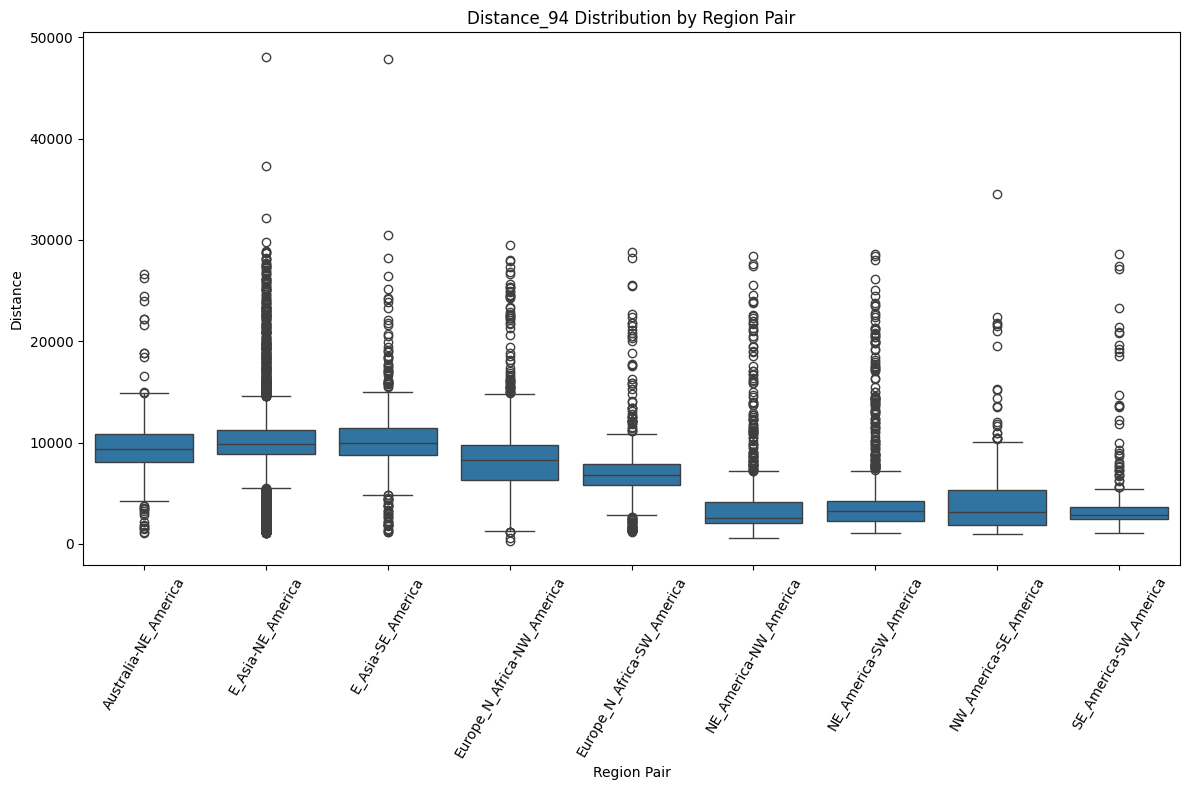

In [ ]:
# Distance_94 box plot for each region pair
# Get unique region pairs (excluding the initial columns)
region_pair_columns = flagged_outliers.columns[5:]

# Melt the DataFrame to long format for Seaborn
melted_data = flagged_outliers.melt(
    id_vars=['distance_94'],
    value_vars=region_pair_columns,
    var_name='region_pair',
    value_name='is_region_pair'
)

# Filter data to keep only rows where is_region_pair is 1
filtered_data = melted_data[melted_data['is_region_pair'] == 1]

# Sort the unique region pairs alphabetically
sorted_region_pairs = sorted(filtered_data['region_pair'].unique())

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pair', y='distance_94', data=filtered_data, order=sorted_region_pairs)
plt.title('Distance_94 Distribution by Region Pair')
plt.xlabel('Region Pair')
plt.ylabel('Distance')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [ ]:
#Remove sea_voyage_duration outliers by region pair
def remove_outliers_by_region(df, column_name, region_column, multiplier=1.5):
    """Removes outliers from a DataFrame based on IQR for each region.

    Args:
        df: The DataFrame to modify.
        column_name: The name of the column containing the data to check for outliers.
        region_column: The name of the column containing the region information.
        multiplier: The IQR multiplier to define outliers (default: 1.5).

    Returns:
        The modified DataFrame with outliers removed.
    """

    filtered_df = df.copy()

    for region in df[region_column].unique():
        region_data = df[df[region_column] == region][column_name]
        Q1 = region_data.quantile(0.25)
        Q3 = region_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Filter out outliers for the current region
        filtered_df = filtered_df[
            ~(
                (filtered_df[region_column] == region)
                & ((filtered_df[column_name] < lower_bound) | (filtered_df[column_name] > upper_bound))
            )
        ]

    # Reset the index of the filtered DataFrame
    filtered_df = filtered_df.reset_index(drop=True)

    return filtered_df

# Apply the function to Bulk_PA
Bulk_PA = remove_outliers_by_region(Bulk_PA, 'voy_sea_duration_h', 'region_pairs')

In [ ]:
# Create the input for the box plot analysis (analysis of outliers removal)
# Create a copy of the relevant columns from Bulk_PA
flagged_outliers_2 = Bulk_PA[['imo', 'load_end_date', 'discharge_start_date', 'voy_sea_duration_h', 'distance', 'distance_94']].copy()

# Get unique region pairs
unique_region_pairs = Bulk_PA['region_pairs'].unique()

# Create binary columns for each region pair
for region_pair in unique_region_pairs:

    flagged_outliers_2[region_pair] = (Bulk_PA['region_pairs'] == region_pair).astype(int)


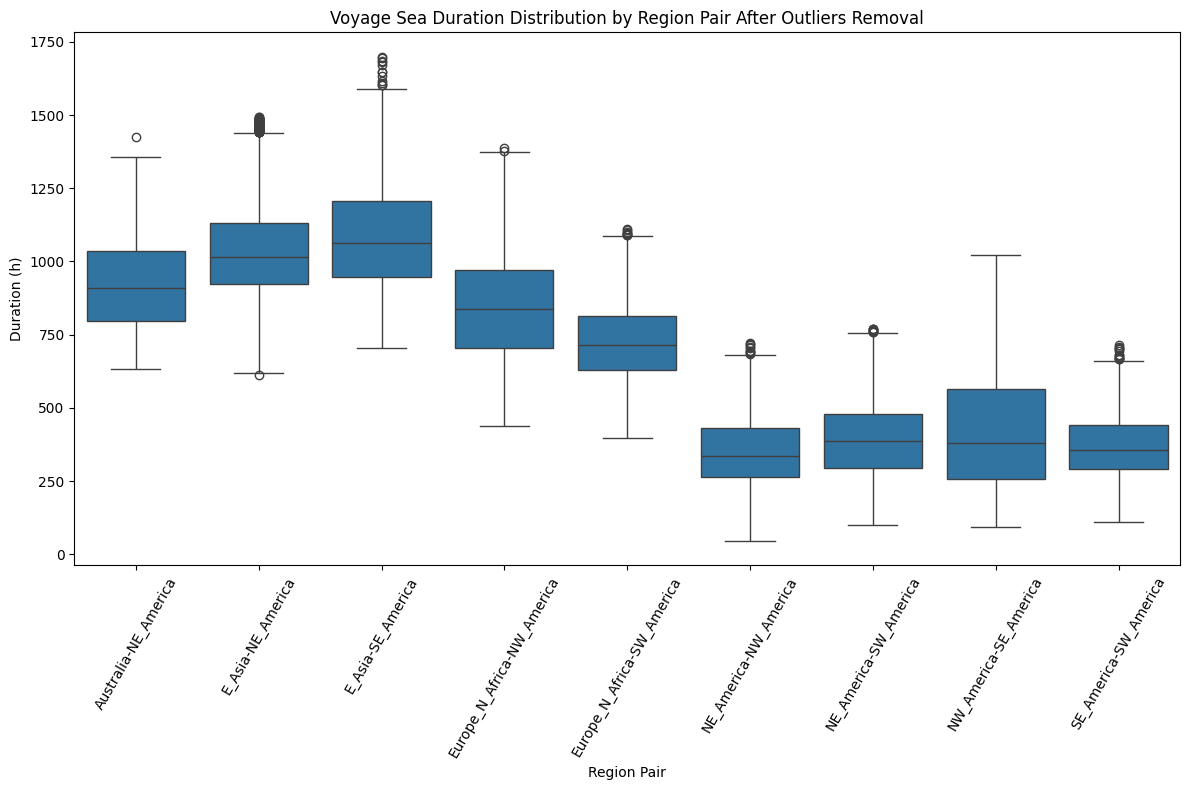

In [ ]:
# Voyage sea duration box plot for each region pair after voyage sea duration outliers removal
# Get unique region pairs (excluding the initial columns)
region_pair_columns = flagged_outliers_2.columns[5:]
# Melt the DataFrame to long format for Seaborn
melted_data = flagged_outliers_2.melt(
    id_vars=['voy_sea_duration_h'],
    value_vars=region_pair_columns,
    var_name='region_pair',
    value_name='is_region_pair'
)

# Filter data to keep only rows where is_region_pair is 1
filtered_data = melted_data[melted_data['is_region_pair'] == 1]

# Sort the unique region pairs alphabetically
sorted_region_pairs = sorted(filtered_data['region_pair'].unique())

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pair', y='voy_sea_duration_h', data=filtered_data, order=sorted_region_pairs)
plt.title('Voyage Sea Duration Distribution by Region Pair After Outliers Removal')
plt.xlabel('Region Pair')
plt.ylabel('Duration (h)')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

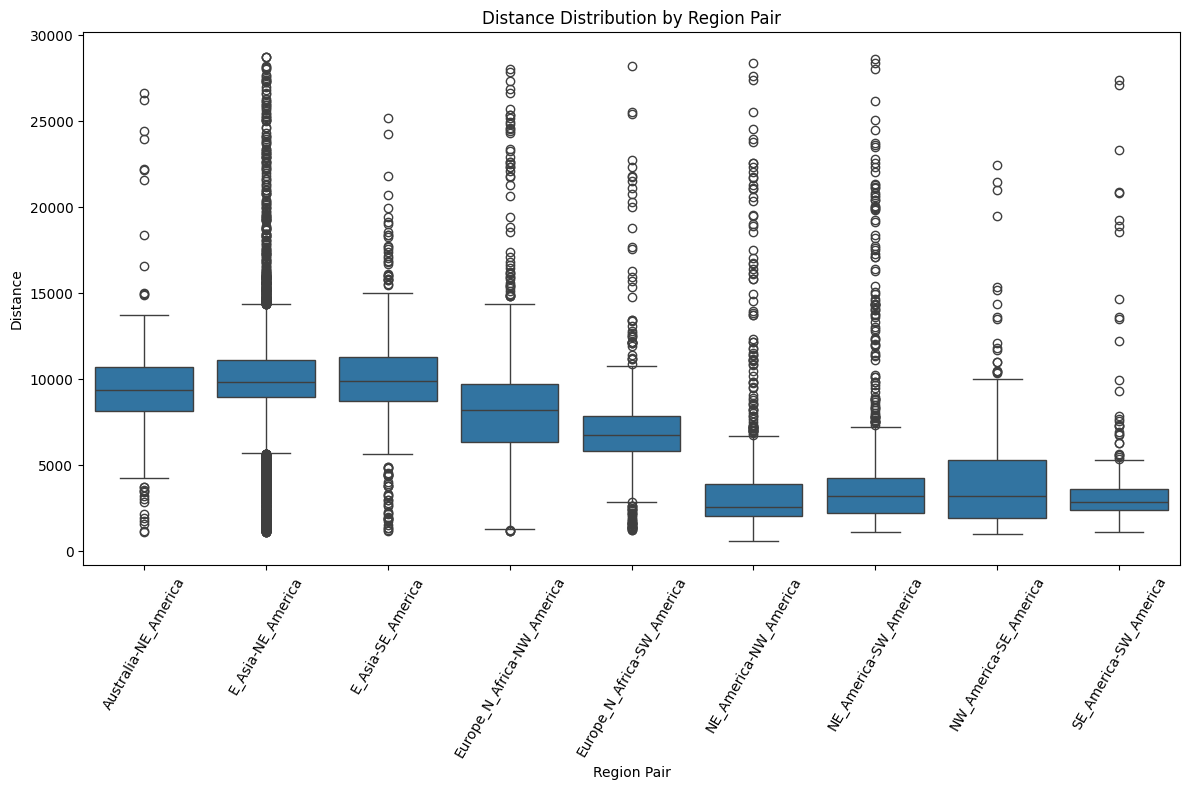

In [ ]:
# Distance_94 box plot for each region pair after voyage sea duration outliers removal
# Get unique region pairs (excluding the initial columns)
region_pair_columns = flagged_outliers_2.columns[5:]
# Melt the DataFrame to long format for Seaborn
melted_data = flagged_outliers_2.melt(
    id_vars=['distance_94'],
    value_vars=region_pair_columns,
    var_name='region_pair',
    value_name='is_region_pair'
)

# Filter data to keep only rows where is_region_pair is 1
filtered_data = melted_data[melted_data['is_region_pair'] == 1]

# Sort the unique region pairs alphabetically
sorted_region_pairs = sorted(filtered_data['region_pair'].unique())

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pair', y='distance_94', data=filtered_data, order=sorted_region_pairs)
plt.title('Distance Distribution by Region Pair')
plt.xlabel('Region Pair')
plt.ylabel('Distance')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [ ]:
#Remove distance_94 outliers using the same approach as for voyage sea duration
Bulk_PA = remove_outliers_by_region(Bulk_PA, 'distance_94', 'region_pairs')

In [ ]:
# Create the input for the box plot analysis (analysis of all outliers removal)
# Create a copy of the relevant columns from Bulk_PA
flagged_outliers_3 = Bulk_PA[['imo', 'load_end_date', 'discharge_start_date', 'voy_sea_duration_h', 'distance', 'distance_94']].copy()

# Get unique region pairs
unique_region_pairs = Bulk_PA['region_pairs'].unique()

# Create binary columns for each region pair
for region_pair in unique_region_pairs:

    flagged_outliers_3[region_pair] = (Bulk_PA['region_pairs'] == region_pair).astype(int)

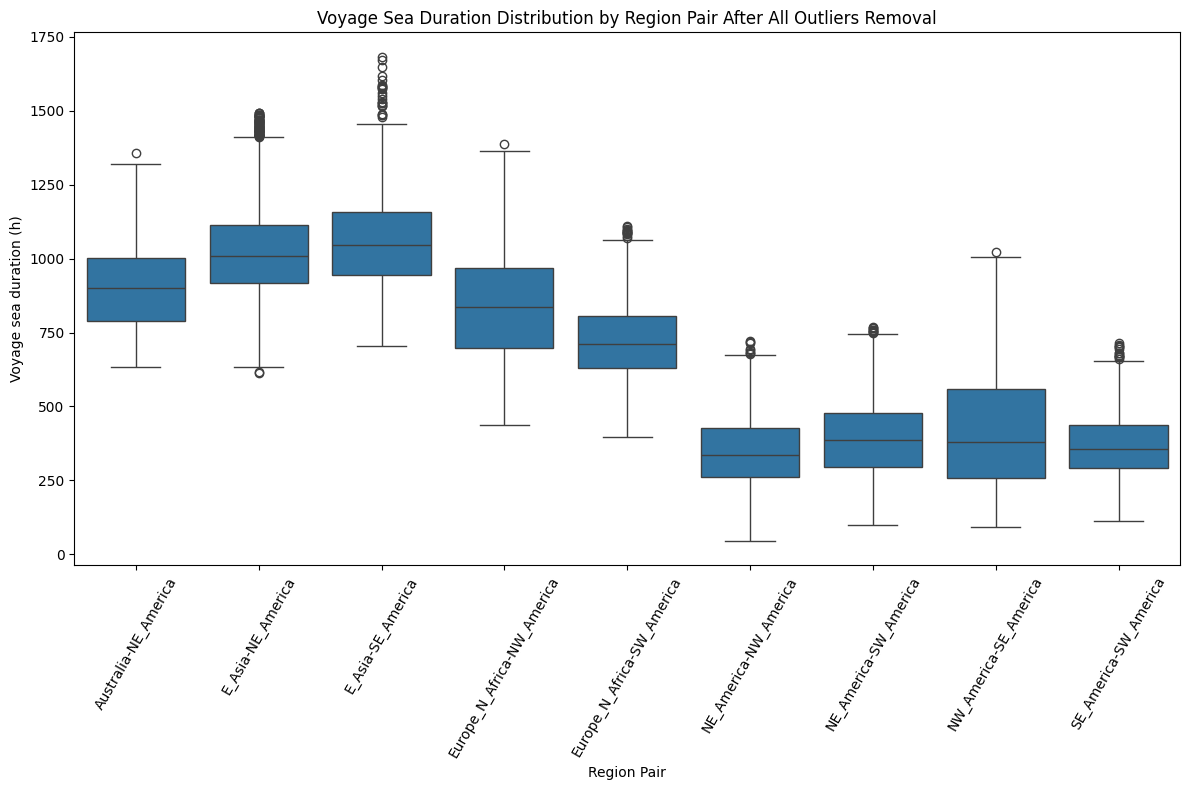

In [ ]:
# Voyage sea duration box plot for each region pair after voyage sea duration and distance_94 outliers removal
# Get unique region pairs (excluding the initial columns)
region_pair_columns = flagged_outliers_3.columns[5:]

# Melt the DataFrame to long format for Seaborn
melted_data = flagged_outliers_3.melt(
    id_vars=['voy_sea_duration_h'],
    value_vars=region_pair_columns,
    var_name='region_pair',
    value_name='is_region_pair'
)

# Filter data to keep only rows where is_region_pair is 1
filtered_data = melted_data[melted_data['is_region_pair'] == 1]

# Sort the unique region pairs alphabetically
sorted_region_pairs = sorted(filtered_data['region_pair'].unique())

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pair', y='voy_sea_duration_h', data=filtered_data, order=sorted_region_pairs)
plt.title('Voyage Sea Duration Distribution by Region Pair After All Outliers Removal')
plt.xlabel('Region Pair')
plt.ylabel('Voyage sea duration (h)')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

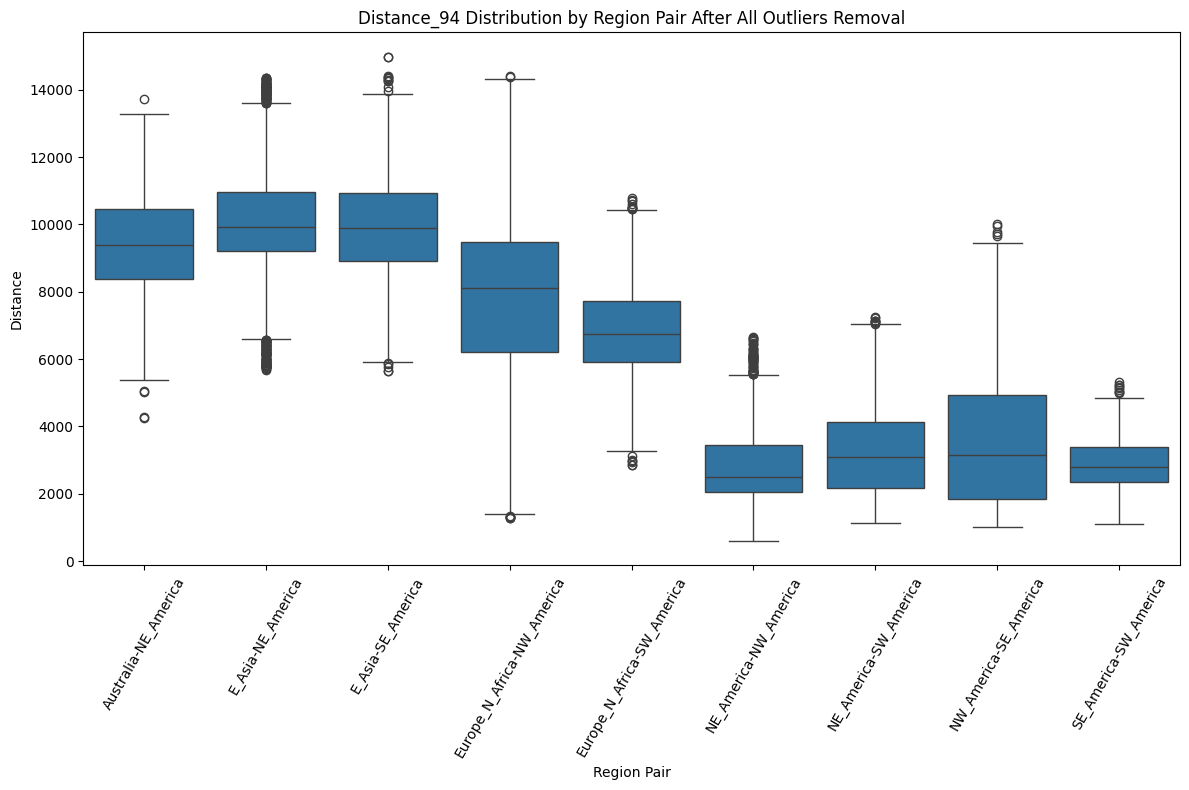

In [ ]:
# Distance_94 box plot for each region pair after voyage sea duration and distance_94 outliers removal
# Get unique region pairs (excluding the initial columns)
region_pair_columns = flagged_outliers_3.columns[5:]
# Melt the DataFrame to long format for Seaborn
melted_data = flagged_outliers_3.melt(
    id_vars=['distance_94'],
    value_vars=region_pair_columns,
    var_name='region_pair',
    value_name='is_region_pair'
)

# Filter data to keep only rows where is_region_pair is 1
filtered_data = melted_data[melted_data['is_region_pair'] == 1]

# Sort the unique region pairs alphabetically
sorted_region_pairs = sorted(filtered_data['region_pair'].unique())

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pair', y='distance_94', data=filtered_data, order=sorted_region_pairs)
plt.title('Distance_94 Distribution by Region Pair After All Outliers Removal')
plt.xlabel('Region Pair')
plt.ylabel('Distance')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

All the outliers have now been removed!

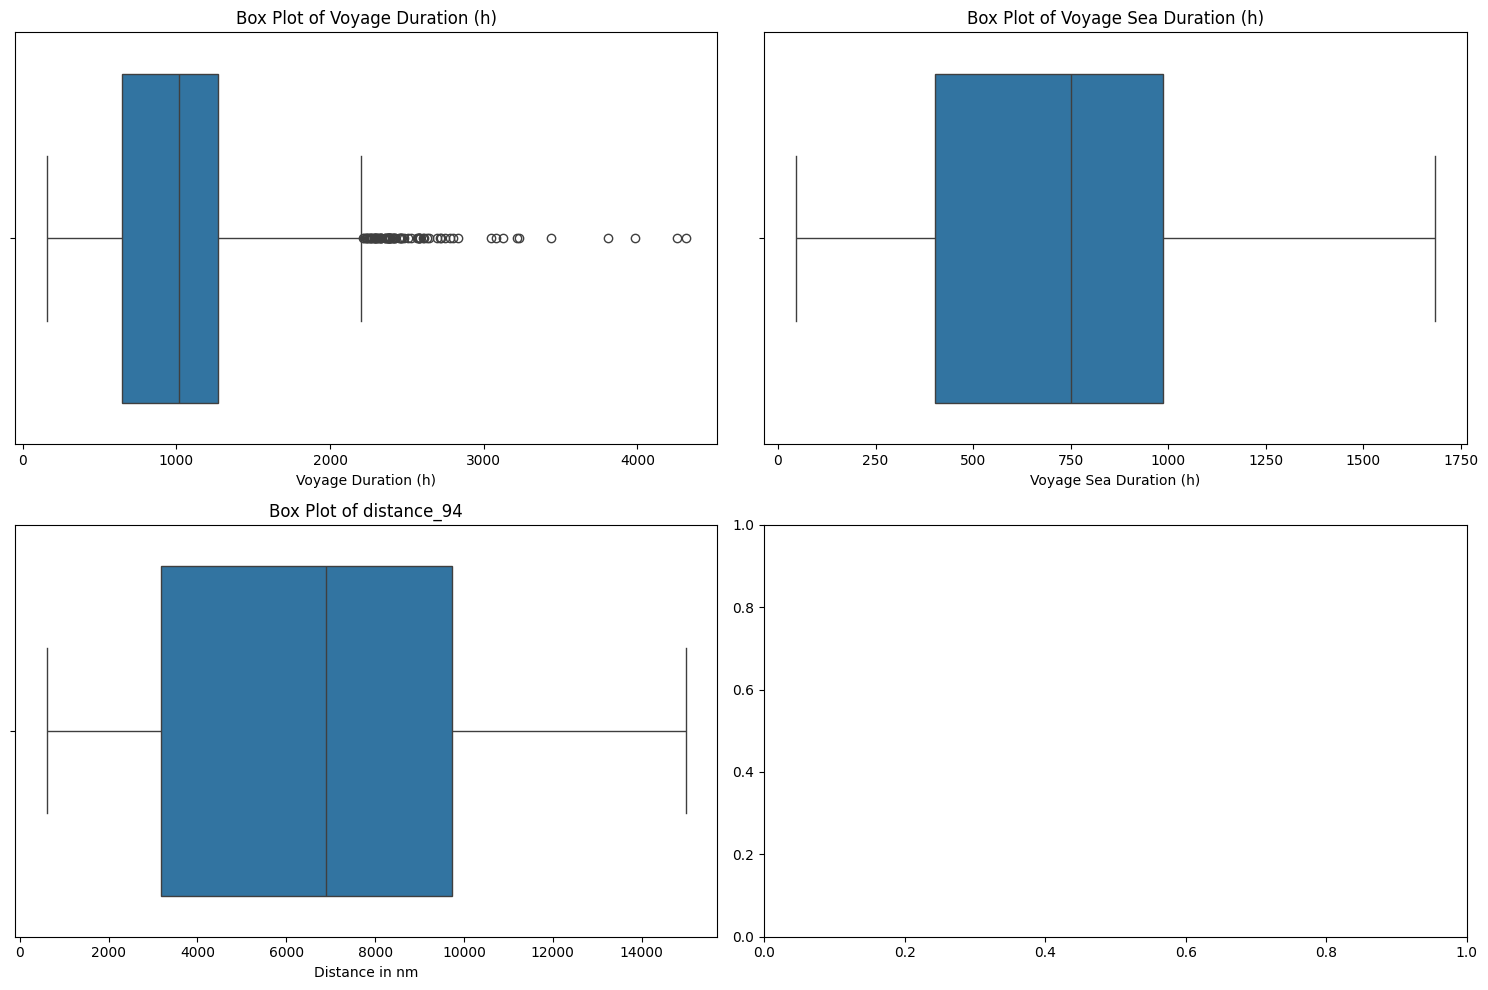

In [ ]:
# Final distribution of voyage duration, and voyage sea duration after filtering the outliers
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 row, 2 columns

# Boxplot for voy_duration_h
sns.boxplot(x=Bulk_PA['voy_duration_h'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Voyage Duration (h)')
axes[0, 0].set_xlabel('Voyage Duration (h)')

# Boxplot for voy_sea_duration_h
sns.boxplot(x=Bulk_PA['voy_sea_duration_h'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Voyage Sea Duration (h)')
axes[0, 1].set_xlabel('Voyage Sea Duration (h)')

# Boxplot for distance_94
sns.boxplot(x=Bulk_PA['distance_94'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of distance_94')
axes[1, 0].set_xlabel('Distance in nm')

plt.tight_layout()
plt.show()

In [ ]:
# Voyage Sea Duration Mean
# Calculate the mean of the 'voy_sea_duration_h' column
mean_voy_sea_duration = Bulk_PA['voy_sea_duration_h'].mean()

# Print the calculated mean
print(f"The mean of voy_sea_duration_h in Bulk_PA is: {mean_voy_sea_duration}")


The mean of voy_sea_duration_h in Bulk_PA is: 708.280988796576


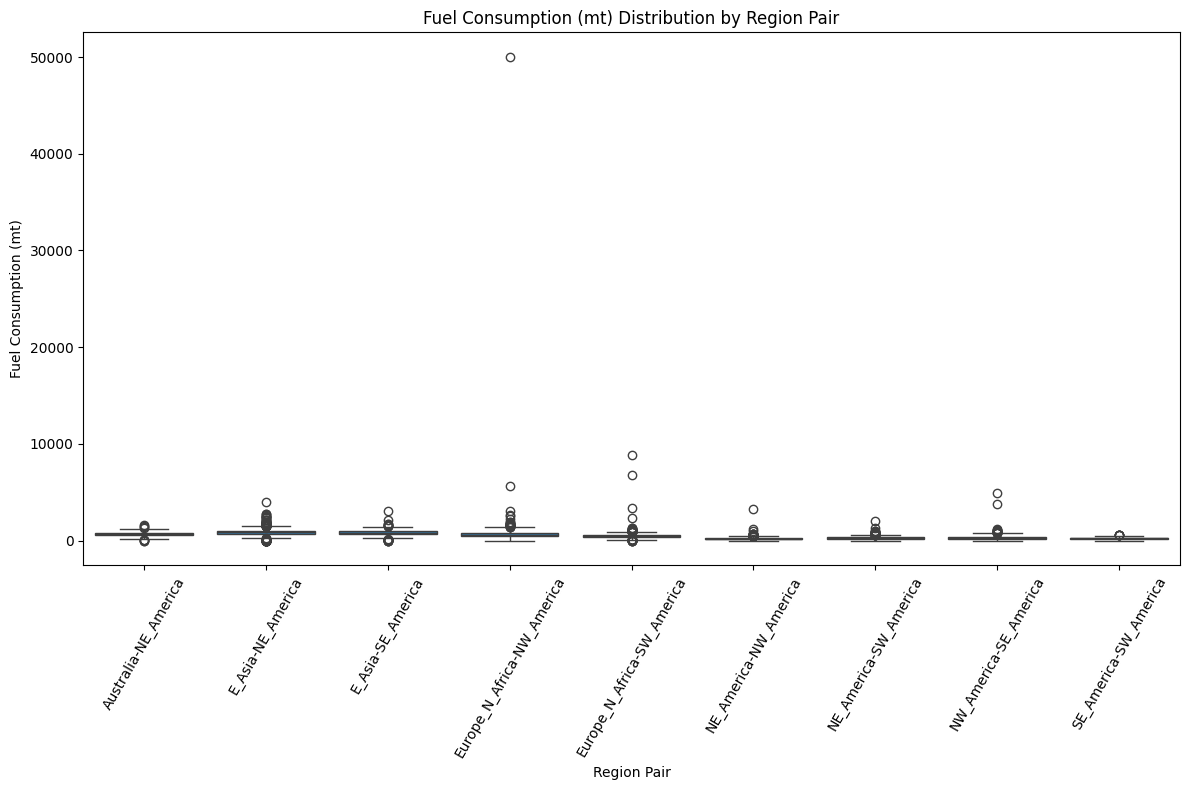

In [ ]:
#Fuel consumption Distribution:
# Create a copy of the relevant columns from Bulk_PA
fuel_region_plot = Bulk_PA[['imo', 'load_end_date', 'discharge_start_date', 'fuel_consumption_mt']].copy()

# Get unique region pairs
unique_region_pairs = Bulk_PA['region_pairs'].unique()

# Create binary columns for each region pair
for region_pair in unique_region_pairs:
    fuel_region_plot[region_pair] = (Bulk_PA['region_pairs'] == region_pair).astype(int)

# Get unique region pairs (excluding the initial columns)
region_pair_columns_fuel = fuel_region_plot.columns[4:]

# Melt the DataFrame to long format for Seaborn
melted_fuel_data = fuel_region_plot.melt(
    id_vars=['fuel_consumption_mt'],
    value_vars=region_pair_columns_fuel,
    var_name='region_pair',
    value_name='is_region_pair'
)

# Filter data to keep only rows where is_region_pair is 1
filtered_fuel_data = melted_fuel_data[melted_fuel_data['is_region_pair'] == 1]

# Sort the unique region pairs alphabetically
sorted_region_pairs = sorted(filtered_fuel_data['region_pair'].unique())

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pair', y='fuel_consumption_mt', data=filtered_fuel_data, order=sorted_region_pairs)
plt.title('Distribution of Fuel Consumption per Region Pair')
plt.xlabel('Region Pair')
plt.ylabel('Fuel consumption (mt)')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

As we can see we have one value of fuel consumption that is a clear outlier. We will remove the outliers

In [ ]:
# Filter the DataFrame to show rows identify the fuel_consumption_mt that is greater than 50000
high_fuel_consumption = Bulk_PA[Bulk_PA['fuel_consumption_mt'] >= 50000]

# Display the filtered DataFrame
display(high_fuel_consumption)

,load_zone,load_country,load_port,load_draft,load_start_date,load_end_date,discharge_zone,discharge_country,discharge_port,discharge_draft,discharge_start_date,discharge_end_date,commodity,commodity_group,imo,vsl_dwt,vsl_name,vsl_type,vsl_max_speed,vsl_max_draft,has_part_voy,voy_draft_diff,voy_load_draft_ratio,voy_intake_mt,voy_avg_speed,voy_speed_ratio,voy_top_speed,voy_duration_h,voy_sea_duration_h,voy_ais_destination,blackout_duration_h,me_con_g,ae_con_g,ab_con_g,distance,fuel_consumption_mt,proxy_distance,distance_difference,distance_94,load_NE_America,load_NW_America,load_SE_America,load_SW_America,load_E_Asia,load_Europe_N_Africa,load_Australia,disch_NE_America,disch_NW_America,disch_SE_America,disch_SW_America,disch_E_Asia,disch_Europe_N_Africa,disch_Australia,OD_region,region_pairs
10874,NoPac,Canada,Vancouver (Can),12.1,2024-10-08 23:09:52,2024-10-11,East Mediterranean,Turkiye,Mersin,7.3,2024-12-05,2024-12-06 04:29:37,Lentils Bagged,Agriprods,9703643,60948,NM SAKURA,Bulk Carrier,15.0,12.936,1,4.8,93.5374,52929,11.52,76.8,20.0,1397.333333,1116.533333,Mersin,13.95,4.995715e+10,72204275.0,1.866544e+07,12030.035523,50048.022052,12862.464,-832.428477,12030.035523,0,1,0,0,0,0,0,0,0,0,0,0,1,0,NW_America_to_Europe_N_Africa,Europe_N_Africa-NW_America


In [ ]:
# Remove fuel consumption outliers
def remove_outliers_by_region(df, column_name, region_column, multiplier=1.5):
    """Removes outliers from a DataFrame based on IQR for each region.

    Args:
        df: The DataFrame to modify.
        column_name: The name of the column containing the data to check for outliers.
        region_column: The name of the column containing the region information.
        multiplier: The IQR multiplier to define outliers (default: 1.5).

    Returns:
        The modified DataFrame with outliers removed.
    """

    filtered_df = df.copy()

    for region in df[region_column].unique():
        region_data = df[df[region_column] == region][column_name]
        Q1 = region_data.quantile(0.25)
        Q3 = region_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Filter out outliers for the current region
        filtered_df = filtered_df[
            ~(
                (filtered_df[region_column] == region)
                & ((filtered_df[column_name] < lower_bound) | (filtered_df[column_name] > upper_bound))
            )
        ]

    # Reset the index of the filtered DataFrame
    filtered_df = filtered_df.reset_index(drop=True)

    return filtered_df

# Apply the function to remove outliers from 'fuel_consumption_mt'
Bulk_PA = remove_outliers_by_region(Bulk_PA, 'fuel_consumption_mt', 'region_pairs')

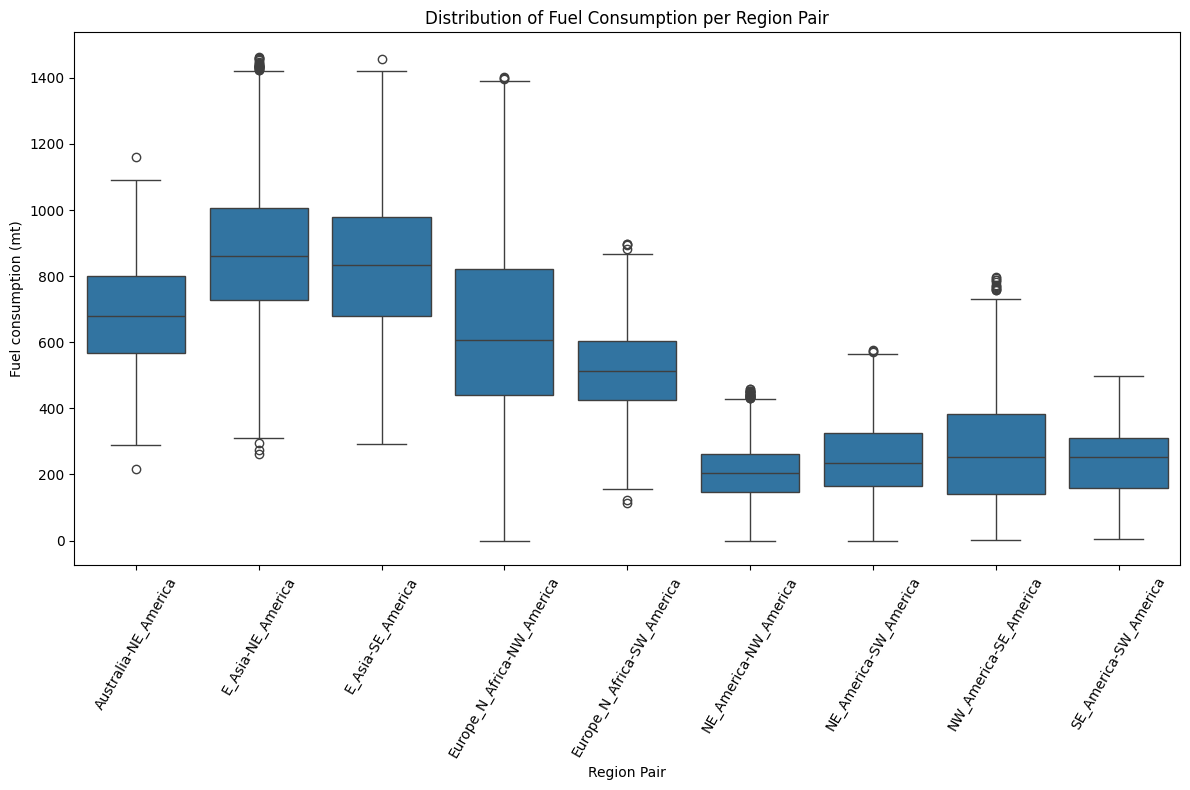

In [ ]:
# Distribution of fuel consumption per region pair
# Create a copy of the relevant columns from Bulk_PA
fuel_region_plot = Bulk_PA[['imo', 'load_end_date', 'discharge_start_date', 'fuel_consumption_mt']].copy()

# Get unique region pairs
unique_region_pairs = Bulk_PA['region_pairs'].unique()

# Create binary columns for each region pair
for region_pair in unique_region_pairs:
    fuel_region_plot[region_pair] = (Bulk_PA['region_pairs'] == region_pair).astype(int)

# Get unique region pairs (excluding the initial columns)
region_pair_columns_fuel = fuel_region_plot.columns[4:]

# Melt the DataFrame to long format for Seaborn
melted_fuel_data = fuel_region_plot.melt(
    id_vars=['fuel_consumption_mt'],
    value_vars=region_pair_columns_fuel,
    var_name='region_pair',
    value_name='is_region_pair'
)

# Filter data to keep only rows where is_region_pair is 1
filtered_fuel_data = melted_fuel_data[melted_fuel_data['is_region_pair'] == 1]

# Sort the unique region pairs alphabetically
sorted_region_pairs = sorted(filtered_fuel_data['region_pair'].unique())

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pair', y='fuel_consumption_mt', data=filtered_fuel_data, order=sorted_region_pairs)
plt.title('Distribution of Fuel Consumption per Region Pair')
plt.xlabel('Region Pair')
plt.ylabel('Fuel consumption (mt)')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

### **Second shortest distance**

In [ ]:
# Input for the analysis to determine the second shortest diatance (rerouted bulk carriers)
# List the top 3 ports for each of the OD_region in terms of transit number based on load_port

# Group by OD region and port and count the number of transits (rows)
Bulk_PA_pre_EL_Nino = Bulk_PA[Bulk_PA['load_end_date']<'2023-06']
port_transit_counts = Bulk_PA_pre_EL_Nino.groupby(['OD_region', 'load_port'])['load_draft'].count().reset_index(name='transit_count')

# Sort within each region and get the top 3
top_ports_per_region = port_transit_counts.groupby('OD_region').apply(lambda x: x.nlargest(3, 'transit_count')).reset_index(drop=True)

# Add a frequency column to display "Transit_count/Total_transits_in_that_OD_Region"
total_transits_per_region = port_transit_counts.groupby('OD_region')['transit_count'].sum().reset_index(name='total_transits')

# Print the result
display(top_ports_per_region)
display(total_transits_per_region)

<ipython-input-325-b03832fd501a>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_ports_per_region = port_transit_counts.groupby('OD_region').apply(lambda x: x.nlargest(3, 'transit_count')).reset_index(drop=True)


,OD_region,load_port,transit_count
0,Australia_to_NE_America,Townsville,18
1,Australia_to_NE_America,Bell Bay,11
2,Australia_to_NE_America,Gladstone,6
3,E_Asia_to_NE_America,Tianjin,111
4,E_Asia_to_NE_America,Kwangyang,61
5,E_Asia_to_NE_America,Pohang,52
6,E_Asia_to_SE_America,Fukuyama,5
7,E_Asia_to_SE_America,Tianjin,4
8,E_Asia_to_SE_America,Kinuura,3
9,Europe_N_Africa_to_NW_America,Casablanca,62


,OD_region,total_transits
0,Australia_to_NE_America,63
1,E_Asia_to_NE_America,970
2,E_Asia_to_SE_America,41
3,Europe_N_Africa_to_NW_America,413
4,Europe_N_Africa_to_SW_America,274
5,NE_America_to_Australia,57
6,NE_America_to_E_Asia,2042
7,NE_America_to_NW_America,703
8,NE_America_to_SW_America,807
9,NW_America_to_Europe_N_Africa,726


In [ ]:
# Merge the two dataframes
merged_ports_info = pd.merge(top_ports_per_region, total_transits_per_region, on='OD_region')

# Calculate the frequency in percentage
merged_ports_info['frequency_%'] = (merged_ports_info['transit_count'] / merged_ports_info['total_transits']) * 100

# Display the combined information
display(merged_ports_info)

,OD_region,load_port,transit_count,total_transits,frequency_%
0,Australia_to_NE_America,Townsville,18,63,28.571429
1,Australia_to_NE_America,Bell Bay,11,63,17.460317
2,Australia_to_NE_America,Gladstone,6,63,9.523810
3,E_Asia_to_NE_America,Tianjin,111,970,11.443299
4,E_Asia_to_NE_America,Kwangyang,61,970,6.288660
5,E_Asia_to_NE_America,Pohang,52,970,5.360825
6,E_Asia_to_SE_America,Fukuyama,5,41,12.195122
7,E_Asia_to_SE_America,Tianjin,4,41,9.756098
8,E_Asia_to_SE_America,Kinuura,3,41,7.317073
9,Europe_N_Africa_to_NW_America,Casablanca,62,413,15.012107


In [ ]:
# Set pandas options to display all column content
pd.set_option('display.max_colwidth', None)

# Merge the two dataframes
merged_ports_info = pd.merge(top_ports_per_region, total_transits_per_region, on='OD_region')

# Calculate the frequency in percentage
merged_ports_info['frequency_%'] = (merged_ports_info['transit_count'] / merged_ports_info['total_transits']) * 100

# Create the new table with aggregated information
new_table_aggregated = merged_ports_info.groupby('OD_region').agg(
    load_ports=('load_port', lambda x: list(x)),
    sum_top3_transit_count=('transit_count', 'sum'),
    total_transits=('total_transits', 'first')
).reset_index()

# Calculate the total top 3 frequency
new_table_aggregated['total_top3_frequency_%'] = (new_table_aggregated['sum_top3_transit_count'] / new_table_aggregated['total_transits']) * 100

# Sort the table by 'total_top3_frequency_%' in descending order
new_table_sorted = new_table_aggregated.sort_values(by='total_transits', ascending=False).reset_index(drop=True)

# Format the 'total_top3_frequency_%' column to 2 decimal places
new_table_sorted['total_top3_frequency_%'] = new_table_sorted['total_top3_frequency_%'].round(2)

# Define a dictionary for renaming columns
new_column_names = {
    'OD_region': 'O-D Region',
    'load_ports': 'Top 3 Load Ports',
    'sum_top3_transit_count': 'Total Transits (Top 3 Ports)',
    'total_transits': 'Total Transits in O-D Region',
    'total_top3_frequency_%': 'Frequency of Top 3 Ports (%)'
}

# Rename the columns
new_table_sorted = new_table_sorted.rename(columns=new_column_names)

# Display the sorted and formatted table with new column names
display(new_table_sorted)

,O-D Region,Top 3 Load Ports,Total Transits (Top 3 Ports),Total Transits in O-D Region,Frequency of Top 3 Ports (%)
0,NE_America_to_E_Asia,"[Convent, Reserve, New Orleans]",827,2042,40.50
1,E_Asia_to_NE_America,"[Tianjin, Kwangyang, Pohang]",224,970,23.09
2,SW_America_to_NE_America,"[Patillos, Puerto Patache, Bayovar]",650,940,69.15
3,NE_America_to_SW_America,"[Destrehan, New Orleans, Darrow]",286,807,35.44
4,NW_America_to_Europe_N_Africa,"[Vancouver (Can), Prince Rupert, Guaymas]",496,726,68.32
5,NE_America_to_NW_America,"[Destrehan, Ama, Darrow]",372,703,52.92
6,Europe_N_Africa_to_NW_America,"[Casablanca, Heroya, Antwerp]",143,413,34.62
7,NW_America_to_NE_America,"[Lazaro Cardenas, Morro Redondo, Corinto]",257,371,69.27
8,SE_America_to_NW_America,"[Puerto Nuevo - Colombia, Puerto Drummond, Pecem]",171,351,48.72
9,SE_America_to_SW_America,"[Puerto Drummond, Puerto Bolivar (Colombia), Puerto Nuevo - Colombia]",237,338,70.12


In [ ]:
# Further analysis are presented in the Excel sheet
# Import the second shortest distance from Excel
second_shortest_distance = pd.read_excel('Second shortest distances.xlsx',sheet_name='Distance2nd')

In [ ]:
second_shortest_distance

,Region_pair,Shortest_distance_nm,Shortest_distance_day,Second_shortest_distance_nm,Second_shortest_distance_day,Rerouting_nm,Rerouting_day,Rerouting (%),Route
0,NE_America-SW_America,2940.0,9.425,10267.5,32.910,7327.5,23.485,249.234694,Cape Horn
1,Europe_N_Africa-NW_America,8064.5,25.845,13603.5,43.600,5539.0,17.755,68.683737,Cape Horn
2,NW_America-SE_America,3661.5,11.735,12510.5,40.095,8849.0,28.360,241.676908,Cape Horn
3,E_Asia-NE_America,10309.0,33.040,16008.0,51.310,5699.0,18.270,55.281793,Cape of Good Hope
4,E_Asia-SE_America,8463.0,27.130,14312.0,45.870,5849.0,18.740,69.112608,Cape of Good Hope
5,Australia-NE_America,9423.0,30.200,13778.0,44.160,4355.0,13.960,46.216704,Cape Horn
6,Europe_N_Africa-SW_America,8023.0,25.710,11007.0,35.280,2984.0,9.570,37.193070,Cape Horn
7,NE_America-NW_America,3117.0,9.995,12518.5,40.120,9401.5,30.125,301.620148,Cape Horn
8,SE_America-SW_America,2021.0,6.475,8764.0,28.090,6743.0,21.615,333.646710,Cape Horn


In [ ]:
Bulk_PA.head()

,load_zone,load_country,load_port,load_draft,load_start_date,load_end_date,discharge_zone,discharge_country,discharge_port,discharge_draft,discharge_start_date,discharge_end_date,commodity,commodity_group,imo,vsl_dwt,vsl_name,vsl_type,vsl_max_speed,vsl_max_draft,has_part_voy,voy_draft_diff,voy_load_draft_ratio,voy_intake_mt,voy_avg_speed,voy_speed_ratio,voy_top_speed,voy_duration_h,voy_sea_duration_h,voy_ais_destination,blackout_duration_h,me_con_g,ae_con_g,ab_con_g,distance,fuel_consumption_mt,proxy_distance,distance_difference,distance_94,load_NE_America,load_NW_America,load_SE_America,load_SW_America,load_E_Asia,load_Europe_N_Africa,load_Australia,disch_NE_America,disch_NW_America,disch_SE_America,disch_SW_America,disch_E_Asia,disch_Europe_N_Africa,disch_Australia,OD_region,region_pairs
0,West Coast South America,Peru,Bayovar,12.04,2019-01-03 15:58:12,2019-01-03,USG,USA,Manatee,6.1,2019-01-15,2019-01-21 09:18:49,Phosphate Rock,Fertilizers,9240811,52514,MARIA F,Bulk Carrier,14.5,12.040,0,5.94,100.0000,48967,12.55,86.55,13.49,425.350000,266.933333,Manatee,171.916667,NaN,NaN,NaN,NaN,NaN,3350.013333,NaN,3350.013333,0,0,0,1,0,0,0,1,0,0,0,0,0,0,SW_America_to_NE_America,NE_America-SW_America
1,West Coast South America,Chile,Puerto Patache,11.80,2019-01-01 17:56:12,2019-01-03,East Coast U.S,USA,New York,6.5,2019-01-21,2019-01-24 00:48:47,Salt,Bulk,9490832,57970,Genco Rhone,Bulk Carrier,14.3,12.950,0,5.30,91.1197,48266,11.16,78.04,13.23,534.883333,390.366667,New York,0.000000,377115073.2,20383447.50,3.040235e+06,42224.57936,400.538755,4356.492000,37868.08736,4356.492000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,SW_America_to_NE_America,NE_America-SW_America
2,North West Africa,Morocco,Casablanca,12.20,2019-01-01 06:07:01,2019-01-03,West Coast Central America,Mexico,Lazaro Cardenas,6.9,2019-01-29,2019-02-02 03:19:16,Phosphate Rock,Fertilizers,9801249,63602,BELNIPPON,Bulk Carrier,14.5,13.418,0,5.30,88.6868,50863,13.13,90.55,15.50,765.200000,575.000000,Lazaro Cardenas,0.000000,553014417.3,47963444.75,1.508180e+07,111108.55580,616.059661,7549.750000,103558.80580,7549.750000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,Europe_N_Africa_to_NW_America,Europe_N_Africa-NW_America
3,West Mediterranean,Spain,Barcelona,10.90,2019-01-01 19:39:22,2019-01-04,West Coast Central America,Costa Rica,Caldera (Costa Rica),6.3,2019-01-31,2019-02-02 10:46:45,Clinker,Breakbulk,9692727,55757,AQUAVITA BAY,Bulk Carrier,14.5,12.735,0,4.60,85.5909,42697,11.67,80.48,14.02,759.116667,595.300000,Caldera (Costa Rica),0.000000,447151929.9,27578378.75,6.145678e+06,53915.68001,480.875986,6947.151000,46968.52901,6947.151000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,Europe_N_Africa_to_NW_America,Europe_N_Africa-NW_America
4,USG,USA,Port Arthur,11.90,2019-01-01 10:59:37,2019-01-04,Far East,Japan,Yokkaichi,6.0,2019-02-20,2019-02-25 03:19:47,Petroleum Coke,Bulk,9407873,55277,XIN AN YUAN,Bulk Carrier,14.6,12.520,0,5.90,95.0479,48968,11.84,81.10,17.18,1312.333333,860.150000,Yokkaichi,0.000000,NaN,NaN,NaN,NaN,NaN,10184.176000,NaN,10184.176000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,NE_America_to_E_Asia,E_Asia-NE_America


In [ ]:
# Create new columns in Bulk_PA to include the information from second_shortest_distance data frame
Bulk_PA['shortest_distance_nm'] = np.nan
Bulk_PA['shortest_distance_day'] = np.nan
Bulk_PA['second_shortest_distance_nm'] = np.nan
Bulk_PA['second_shortest_distance_day'] = np.nan
Bulk_PA['rerouting_nm'] = np.nan
Bulk_PA['rerouting_day'] = np.nan
Bulk_PA['rerouting (%)'] = np.nan
Bulk_PA['route'] = np.nan


# Match region_pairs in Bulk_PA to Region_pair in Second_shortest_distances
# and fill the new columns with the corresponding values
for index, row in Bulk_PA.iterrows():
    region_pair = row['region_pairs']
    match = second_shortest_distance[second_shortest_distance['Region_pair'] == region_pair]
    if not match.empty:
        Bulk_PA.loc[index, 'shortest_distance_nm'] = match.iloc[0]['Shortest_distance_nm']
        Bulk_PA.loc[index, 'shortest_distance_day'] = match.iloc[0]['Shortest_distance_day']
        Bulk_PA.loc[index, 'second_shortest_distance_nm'] = match.iloc[0]['Second_shortest_distance_nm']
        Bulk_PA.loc[index, 'second_shortest_distance_day'] = match.iloc[0]['Second_shortest_distance_day']
        Bulk_PA.loc[index, 'rerouting_nm'] = match.iloc[0]['Rerouting_nm']
        Bulk_PA.loc[index, 'rerouting_day'] = match.iloc[0]['Rerouting_day']
        Bulk_PA.loc[index, 'rerouting (%)'] = match.iloc[0]['Rerouting (%)']
        Bulk_PA.loc[index, 'route'] = match.iloc[0]['Route']
# Display the updated Bulk_PA DataFrame to see the new columns
display(Bulk_PA)

<ipython-input-331-0f41dd3e6cd9>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Cape Horn' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Bulk_PA.loc[index, 'route'] = match.iloc[0]['Route']


,load_zone,load_country,load_port,load_draft,load_start_date,load_end_date,discharge_zone,discharge_country,discharge_port,discharge_draft,discharge_start_date,discharge_end_date,commodity,commodity_group,imo,vsl_dwt,vsl_name,vsl_type,vsl_max_speed,vsl_max_draft,has_part_voy,voy_draft_diff,voy_load_draft_ratio,voy_intake_mt,voy_avg_speed,voy_speed_ratio,voy_top_speed,voy_duration_h,voy_sea_duration_h,voy_ais_destination,blackout_duration_h,me_con_g,ae_con_g,ab_con_g,distance,fuel_consumption_mt,proxy_distance,distance_difference,distance_94,load_NE_America,load_NW_America,load_SE_America,load_SW_America,load_E_Asia,load_Europe_N_Africa,load_Australia,disch_NE_America,disch_NW_America,disch_SE_America,disch_SW_America,disch_E_Asia,disch_Europe_N_Africa,disch_Australia,OD_region,region_pairs,shortest_distance_nm,shortest_distance_day,second_shortest_distance_nm,second_shortest_distance_day,rerouting_nm,rerouting_day,rerouting (%),route
0,West Coast South America,Peru,Bayovar,12.04,2019-01-03 15:58:12,2019-01-03,USG,USA,Manatee,6.1,2019-01-15,2019-01-21 09:18:49,Phosphate Rock,Fertilizers,9240811,52514,MARIA F,Bulk Carrier,14.5,12.040,0,5.94,100.0000,48967,12.55,86.55,13.49,425.350000,266.933333,Manatee,171.916667,NaN,NaN,NaN,NaN,NaN,3350.013333,NaN,3350.013333,0,0,0,1,0,0,0,1,0,0,0,0,0,0,SW_America_to_NE_America,NE_America-SW_America,2940.0,9.425,10267.5,32.910,7327.5,23.485,249.234694,Cape Horn
1,West Coast South America,Chile,Puerto Patache,11.80,2019-01-01 17:56:12,2019-01-03,East Coast U.S,USA,New York,6.5,2019-01-21,2019-01-24 00:48:47,Salt,Bulk,9490832,57970,Genco Rhone,Bulk Carrier,14.3,12.950,0,5.30,91.1197,48266,11.16,78.04,13.23,534.883333,390.366667,New York,0.000000,3.771151e+08,2.038345e+07,3.040235e+06,42224.579360,400.538755,4356.492000,37868.087360,4356.492000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,SW_America_to_NE_America,NE_America-SW_America,2940.0,9.425,10267.5,32.910,7327.5,23.485,249.234694,Cape Horn
2,North West Africa,Morocco,Casablanca,12.20,2019-01-01 06:07:01,2019-01-03,West Coast Central America,Mexico,Lazaro Cardenas,6.9,2019-01-29,2019-02-02 03:19:16,Phosphate Rock,Fertilizers,9801249,63602,BELNIPPON,Bulk Carrier,14.5,13.418,0,5.30,88.6868,50863,13.13,90.55,15.50,765.200000,575.000000,Lazaro Cardenas,0.000000,5.530144e+08,4.796344e+07,1.508180e+07,111108.555800,616.059661,7549.750000,103558.805800,7549.750000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,Europe_N_Africa_to_NW_America,Europe_N_Africa-NW_America,8064.5,25.845,13603.5,43.600,5539.0,17.755,68.683737,Cape Horn
3,West Mediterranean,Spain,Barcelona,10.90,2019-01-01 19:39:22,2019-01-04,West Coast Central America,Costa Rica,Caldera (Costa Rica),6.3,2019-01-31,2019-02-02 10:46:45,Clinker,Breakbulk,9692727,55757,AQUAVITA BAY,Bulk Carrier,14.5,12.735,0,4.60,85.5909,42697,11.67,80.48,14.02,759.116667,595.300000,Caldera (Costa Rica),0.000000,4.471519e+08,2.757838e+07,6.145678e+06,53915.680010,480.875986,6947.151000,46968.529010,6947.151000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,Europe_N_Africa_to_NW_America,Europe_N_Africa-NW_America,8064.5,25.845,13603.5,43.600,5539.0,17.755,68.683737,Cape Horn
4,USG,USA,Port Arthur,11.90,2019-01-01 10:59:37,2019-01-04,Far East,Japan,Yokkaichi,6.0,2019-02-20,2019-02-25 03:19:47,Petroleum Coke,Bulk,9407873,55277,XIN AN YUAN,Bulk Carrier,14.6,12.520,0,5.90,95.0479,48968,11.84,81.10,17.18,1312.333333,860.150000,Yokkaichi,0.000000,NaN,NaN,NaN,NaN,NaN,10184.176000,NaN,10184.176000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,NE_America_to_E_Asia,E_Asia-NE_America,10309.0,33.040,16008.0,51.310,5699.0,18.270,55.281793,Cape of Good Hope
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10587,USG,USA,Houston,11.80,2024-12-05 16:09:28,2024-12-06,West Coast Central America,Mexico,Manzanillo (Mex),7.0,2024-12-28,2024-12-28 13:26:49,Soybeans,Grain,9781009,64012,ES LEADER,Bulk Ca

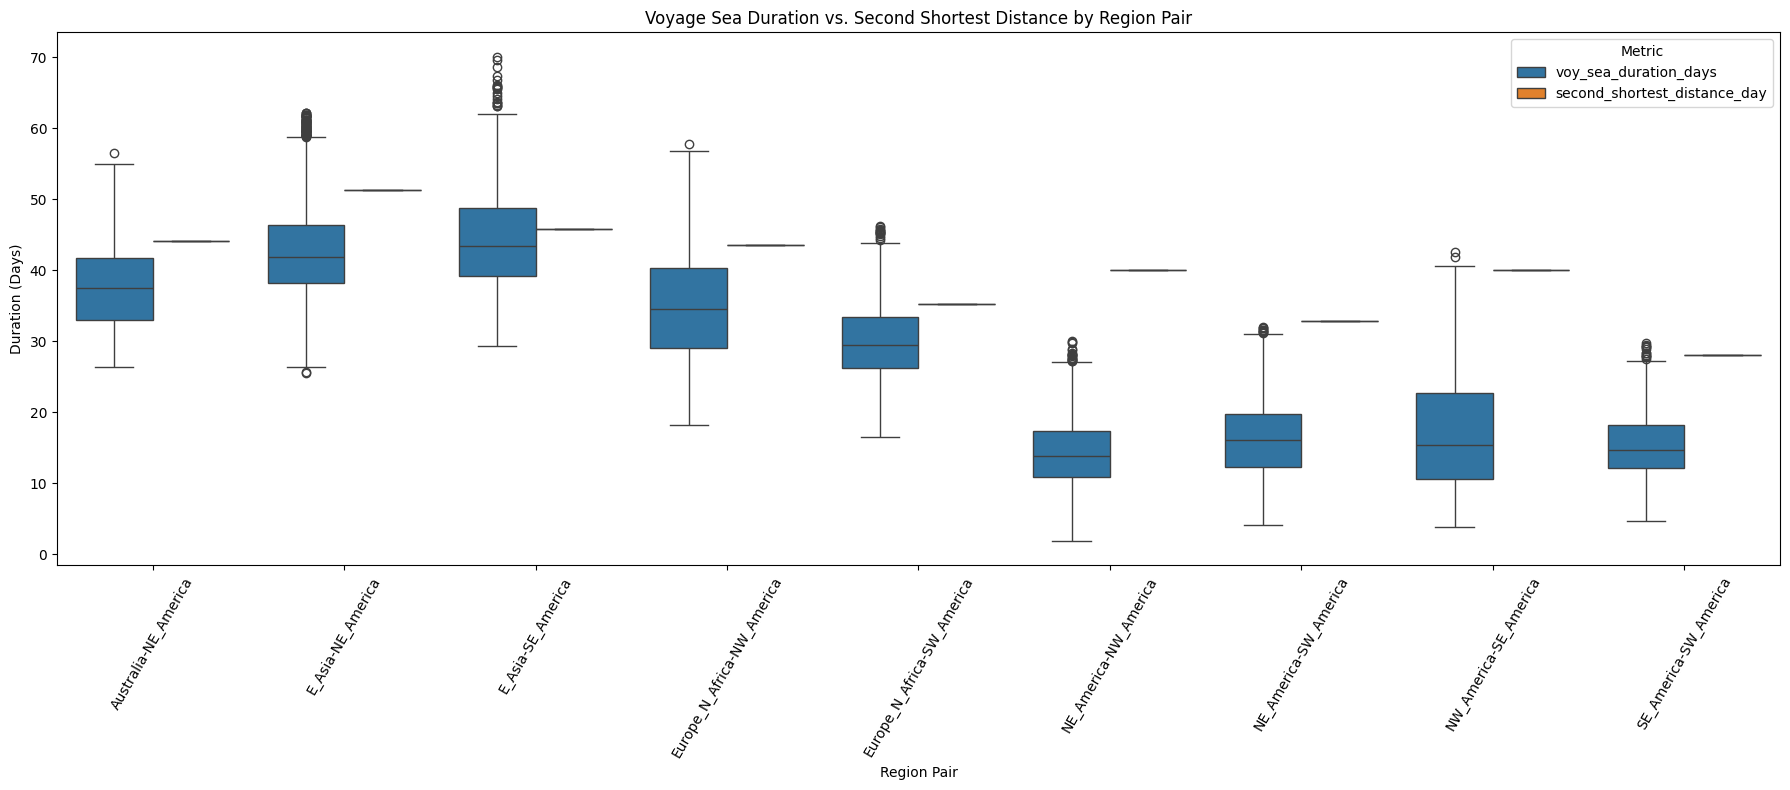

In [ ]:
# Voyage Sea Duration vs Second Shortest Distance
# Prepare the data for plotting
melted_duration_distance = Bulk_PA.melt(
    id_vars=['region_pairs'],
    value_vars=['voy_sea_duration_h', 'second_shortest_distance_day'],
    var_name='Metric',
    value_name='Value'
)

# Convert 'voy_sea_duration_h' values to days
melted_duration_distance.loc[melted_duration_distance['Metric'] == 'voy_sea_duration_h', 'Value'] = melted_duration_distance['Value'] / 24
# Rename the 'Metric' for the converted duration for clarity in the legend
melted_duration_distance['Metric'] = melted_duration_distance['Metric'].replace({'voy_sea_duration_h': 'voy_sea_duration_days'})


# Sort the unique region pairs alphabetically for consistent plotting
sorted_region_pairs = sorted(melted_duration_distance['region_pairs'].unique())

# Create the box plot
plt.figure(figsize=(18, 8)) # Adjust figure size as needed
sns.boxplot(x='region_pairs', y='Value', hue='Metric', data=melted_duration_distance, order=sorted_region_pairs)

plt.title('Voyage Sea Duration vs. Second Shortest Distance by Region Pair')
plt.xlabel('Region Pair')
plt.ylabel('Duration (Days)') # Updated label to reflect days
plt.xticks(rotation=60)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [ ]:
# Create a table comparing shortest and second shortest distance
# Group by 'region_pairs' and calculate the mean of the specified columns and the count of transits
rerouting_analysis_df = Bulk_PA.groupby('region_pairs').agg(
    transit_count=('region_pairs', 'count'),
    average_distance=('distance_94', 'mean'),
    average_shortest_distance_nm=('shortest_distance_nm', 'mean'),
    average_second_shortest_distance_nm=('second_shortest_distance_nm', 'mean'),
    average_rerouting_percentage=('rerouting (%)', 'mean')
).reset_index()

# Format the mean columns by rounding to 0 decimal places
rerouting_analysis_df['average_distance'] = rerouting_analysis_df['average_distance'].round(0)
rerouting_analysis_df['average_shortest_distance_nm'] = rerouting_analysis_df['average_shortest_distance_nm'].round(0)
rerouting_analysis_df['average_second_shortest_distance_nm'] = rerouting_analysis_df['average_second_shortest_distance_nm'].round(0)
rerouting_analysis_df['average_rerouting_percentage'] = rerouting_analysis_df['average_rerouting_percentage'].round(0)

# Convert the columns to integer type to remove decimal display
rerouting_analysis_df['average_distance'] = rerouting_analysis_df['average_distance'].astype(int)
rerouting_analysis_df['average_shortest_distance_nm'] = rerouting_analysis_df['average_shortest_distance_nm'].astype(int)
rerouting_analysis_df['average_second_shortest_distance_nm'] = rerouting_analysis_df['average_second_shortest_distance_nm'].astype(int)
rerouting_analysis_df['average_rerouting_percentage'] = rerouting_analysis_df['average_rerouting_percentage'].astype(int)

# Merge the second shortest distance routes from the Excel file
rerouting_analysis_df = rerouting_analysis_df.merge(
    second_shortest_distance[['Region_pair', 'Route']],
    left_on='region_pairs',
    right_on='Region_pair',
    how='left'
)
# Drop the redundant 'Region_pair' column from the merge
rerouting_analysis_df = rerouting_analysis_df.drop(columns=['Region_pair'])

# Filter 'distance_increae' in ascending order
rerouting_analysis_df = rerouting_analysis_df.sort_values(by='average_rerouting_percentage', ascending=False)

# Rename the columns after aggregation to include spaces
rerouting_analysis_df = rerouting_analysis_df.rename(columns={
    'average_distance': 'average distance (nm)',
    'average_shortest_distance_nm': 'average shortest distance (nm)',
    'average_second_shortest_distance_nm': 'average second shortest distance (nm)',
    'average_rerouting_percentage': 'distance increase (%)',
    'transit_count': 'transit count',
    'Route': 'second shortest route'
})
# Reset index
rerouting_analysis_df = rerouting_analysis_df.reset_index(drop=True)
# Start index from 1
rerouting_analysis_df.index = rerouting_analysis_df.index + 1

# Display the resulting DataFrame
display(rerouting_analysis_df)

,region_pairs,transit count,average distance (nm),average shortest distance (nm),average second shortest distance (nm),distance increase (%),second shortest route
1,SE_America-SW_America,407,2858,2021,8764,334,Cape Horn
2,NE_America-NW_America,1330,2809,3117,12518,302,Cape Horn
3,NE_America-SW_America,2102,3227,2940,10268,249,Cape Horn
4,NW_America-SE_America,658,3514,3662,12510,242,Cape Horn
5,Europe_N_Africa-NW_America,1311,7842,8064,13604,69,Cape Horn
6,E_Asia-SE_America,363,9943,8463,14312,69,Cape of Good Hope
7,E_Asia-NE_America,3564,9991,10309,16008,55,Cape of Good Hope
8,Australia-NE_America,149,9329,9423,13778,46,Cape Horn
9,Europe_N_Africa-SW_America,708,6722,8023,11007,37,Cape Horn


### **Graphs and Analytics**

### **Limitations**

There are still a lot of distances that are not coherent with the origin-destination of the transit. Adjusting these values would be too subjective or too strict. We will work with these limitations.

In [ ]:
# The most problematic regions are associated to Europe_N_Africa-NW_America and Europe_N_Africa-SW-America as has been shown previously from the distance 94 box plot
# Example of outliers (small values)
# Filter by region_pairs and sort by distance_94
Europe_N_Africa_NW_America_data = Bulk_PA[Bulk_PA['region_pairs'] == 'Europe_N_Africa-NW_America'].sort_values(by=['distance_94']).reset_index(drop=True)

Europe_N_Africa_NW_America_data.head(10)

,load_zone,load_country,load_port,load_draft,load_start_date,load_end_date,discharge_zone,discharge_country,discharge_port,discharge_draft,discharge_start_date,discharge_end_date,commodity,commodity_group,imo,vsl_dwt,vsl_name,vsl_type,vsl_max_speed,vsl_max_draft,has_part_voy,voy_draft_diff,voy_load_draft_ratio,voy_intake_mt,voy_avg_speed,voy_speed_ratio,voy_top_speed,voy_duration_h,voy_sea_duration_h,voy_ais_destination,blackout_duration_h,me_con_g,ae_con_g,ab_con_g,distance,fuel_consumption_mt,proxy_distance,distance_difference,distance_94,load_NE_America,load_NW_America,load_SE_America,load_SW_America,load_E_Asia,load_Europe_N_Africa,load_Australia,disch_NE_America,disch_NW_America,disch_SE_America,disch_SW_America,disch_E_Asia,disch_Europe_N_Africa,disch_Australia,OD_region,region_pairs,shortest_distance_nm,shortest_distance_day,second_shortest_distance_nm,second_shortest_distance_day,rerouting_nm,rerouting_day,rerouting (%),route
0,NoPac,Canada,Vancouver (Can),12.0,2021-05-29 08:37:23,2021-05-29,West Mediterranean,Algeria,Djen-Djen,7.3,2021-07-15,2021-07-26 16:22:10,Wheat,Grain,9542491,74979,THALEIA,Bulk Carrier,15.5,14.130,0,4.7,83.5103,55556,11.97,77.23,14.29,1399.750000,1105.466667,Djen-Djen,42.200000,1.174046e+08,1.355451e+07,9.442310e+06,1284.652265,140.401387,13232.436000,-11947.783735,1284.652265,0,1,0,0,0,0,0,0,0,0,0,0,1,0,NW_America_to_Europe_N_Africa,Europe_N_Africa-NW_America,8064.5,25.845,13603.5,43.6,5539.0,17.755,68.683737,Cape Horn
1,Antwerp Rotterdam Amsterdam Ghent,Netherlands,Eemshaven,8.4,2020-10-07 01:55:00,2020-10-09,West Coast Central America,El Salvador,Acajutla,7.7,2020-11-04,2020-11-05 09:23:09,Grain,Grain,9420813,17966,DIAMANTGRACHT,Multi-Purpose,17.0,10.250,1,0.7,80.9756,11824,14.32,84.24,18.26,703.466667,611.383333,Acajutla,178.266667,1.165515e+08,1.661735e+07,1.665366e+06,1287.567763,134.834176,8755.009333,-7467.441570,1287.567763,0,0,0,0,0,1,0,0,1,0,0,0,0,0,Europe_N_Africa_to_NW_America,Europe_N_Africa-NW_America,8064.5,25.845,13603.5,43.6,5539.0,17.755,68.683737,Cape Horn
2,North West Africa,Morocco,Casablanca,11.7,2020-06-11 06:28:40,2020-06-13,West Coast Central America,Mexico,Lazaro Cardenas,6.2,2020-07-12,2020-07-20 02:36:45,Phosphate Rock,Fertilizers,9454084,58831,AKOUR II,Bulk Carrier,14.6,12.676,0,5.5,92.3004,50100,13.09,89.66,14.12,932.133333,525.733333,Lazaro Cardenas,0.000000,1.169417e+08,1.246063e+07,6.850705e+06,1296.477055,136.253037,6881.849333,-5585.372278,1296.477055,0,0,0,0,0,1,0,0,1,0,0,0,0,0,Europe_N_Africa_to_NW_America,Europe_N_Africa-NW_America,8064.5,25.845,13603.5,43.6,5539.0,17.755,68.683737,Cape Horn
3,West Coast Central America,Mexico,Ensenada,5.3,2019-06-07 12:36:29,2019-06-07,North West Africa,Spain,Las Palmas,4.8,2019-07-05,2019-07-05 15:51:03,Grain,Grain,9558464,3750,PACIFIC DAWN,Heavy Lift Cargo Vessel,17.5,5.810,0,0.5,91.2220,2655,13.21,75.49,15.88,675.250000,661.233333,Las Palmas,23.750000,3.278875e+07,1.121587e+06,0.000000e+00,1307.136687,33.910336,8734.892333,-7427.755647,1307.136687,0,1,0,0,0,0,0,0,0,0,0,0,1,0,NW_America_to_Europe_N_Africa,Europe_N_Africa-NW_America,8064.5,25.845,13603.5,43.6,5539.0,17.755,68.683737,Cape Horn
4,West Coast Central America,Mexico,Manzanillo (Mex),11.5,2019-04-29 12:08:37,2019-05-01,Spain Atlantic,Spain,Aviles,5.9,2019-05-31,2019-05-31 12:58:27,Zinc Concentrates,Bulk,9229984,37058,NJ MOON,Bulk Carrier,14.0,11.270,0,5.6,100.2660,35028,11.16,79.71,13.03,768.833333,714.516667,Aviles,155.500000,1.378040e+08,9.908432e+06,2.578430e+06,1315.662566,150.290838,7974.006000,-6658.343434,1315.662566,0,1,0,0,0,0,0,0,0,0,0,0,1,0,NW_America_to_Europe_N_Africa,Europe_N_Africa-NW_America,8064.5,25.845,13603.5,43.6,5539.0,17.755,68.683737,Cape Horn
5,Baltic,Lithuania,Klaipeda,11.8,2021-11-26 17:39:01,2021-11-30,West Coast Central America,Mexico,Manzanillo (Mex),6.8,2022-01-09,2022-01-12 16:04:45,Muriate Of Potash,Fertilizers,9381873,42704,SEMIHA-AHMET-M,Bulk Carrier,14.3,11.810,1,5.0,99.9153,40747,10.38,72.59,19.16,1126.433333,920.700000,Manza

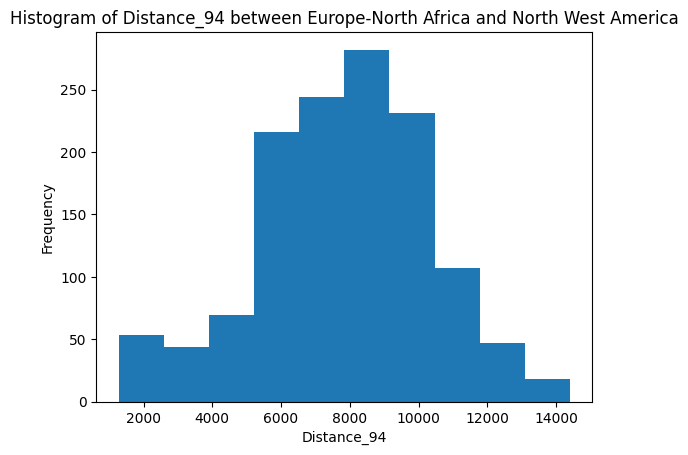

In [ ]:
# Histogram of Distance_94 between Europe-North Africa and the West of North America
plt.hist(Europe_N_Africa_NW_America_data['distance_94'])
plt.xlabel('Distance_94')
plt.ylabel('Frequency')
plt.title('Histogram of Distance_94 between Europe-North Africa and North West America')
plt.show()

The mean of the distribution is the distance expected. However, the minimum value is really small when compared to the expected distance between Europe_North_Africa and North West America. These voyages should average around 8000nm as estimated from dataloy.

In [ ]:
# Download the cleaned dataset
Bulk_PA.to_parquet('Bulk_PA_Clean.parquet')

From now on, we will use this dataset for further analysis

## **Deleted Rows analysis**

Compare the observations before the filtering and after the filtering to know how strict is the filtering

In [ ]:
# Remove duplicates based on imo, load_end_date, and discharge_start_date — keep the first occurrence
Bulk_PA_original_data = Bulk_PA_original_data.drop_duplicates(subset=['vsl_imo', 'load_end_date', 'discharge_start_date'], keep='first').reset_index(drop=True)

print("Duplicates removed. Only one entry per unique (imo, load_end_date, discharge_start_date) remains.")
display(Bulk_PA_original_data.shape)

Duplicates removed. Only one entry per unique (imo, load_end_date, discharge_start_date) remains.


(13947, 56)

In [ ]:
# Merge the DataFrames (original and filtered data) and indicate the source of each row
merged_df = pd.merge(Bulk_PA_original_data, Bulk_PA,
                     on=['load_end_date', 'discharge_start_date'],
                     how='left', indicator=True)

# Filter for rows present only in the original data
missing_rows = merged_df[merged_df['_merge'] == 'left_only']

# Display the missing rows
display(missing_rows)

,load_zone_x,load_country_x,load_port_x,load_berth,load_anchorage,load_draft_x,load_duration,load_full_duration,load_wait_duration,load_full_wait_duration,load_start_date_x,load_end_date,discharge_zone_x,discharge_country_x,discharge_port_x,discharge_berth,discharge_anchorage,discharge_draft_x,discharge_duration,discharge_full_duration,discharge_wait_duration,discharge_full_wait_duration,discharge_start_date,discharge_end_date_x,commodity_x,commodity_group_x,charterer,vsl_imo,vsl_dwt_x,vsl_name_x,vsl_type_x,vsl_max_speed_x,vsl_max_draft_x,has_part_voy_x,voy_draft_diff_x,voy_load_draft_ratio_x,voy_intake_mt_x,voy_avg_speed_x,voy_speed_ratio_x,voy_top_speed_x,voy_duration,voy_sea_duration,voy_ais_destination_x,bunk_duration,bunk_wait_duration,blackout_duration,shipyard_duration,shipyard_wait_duration,previous_zone,previous_port,previous_berth,previous_operation,next_zone,next_port,next_berth,next_operation,load_zone_y,load_country_y,load_port_y,load_draft_y,load_start_date_y,discharge_zone_y,discharge_country_y,discharge_port_y,discharge_draft_y,discharge_end_date_y,commodity_y,commodity_group_y,imo,vsl_dwt_y,vsl_name_y,vsl_type_y,vsl_max_speed_y,vsl_max_draft_y,has_part_voy_y,voy_draft_diff_y,voy_load_draft_ratio_y,voy_intake_mt_y,voy_avg_speed_y,voy_speed_ratio_y,voy_top_speed_y,voy_duration_h,voy_sea_duration_h,voy_ais_destination_y,blackout_duration_h,me_con_g,ae_con_g,ab_con_g,distance,fuel_consumption_mt,proxy_distance,distance_difference,distance_94,load_NE_America,load_NW_America,load_SE_America,load_SW_America,load_E_Asia,load_Europe_N_Africa,load_Australia,disch_NE_America,disch_NW_America,disch_SE_America,disch_SW_America,disch_E_Asia,disch_Europe_N_Africa,disch_Australia,OD_region,region_pairs,shortest_distance_nm,shortest_distance_day,second_shortest_distance_nm,second_shortest_distance_day,rerouting_nm,rerouting_day,rerouting (%),route,_merge
0,Antwerp Rotterdam Amsterdam Ghent,Belgium,Antwerp,Zuid Natie Churchilldock Breakbulk Terminal,None,8.1,4679.0,21098.0,0.0,8381.0,2018-09-30 11:59:36,2018-10-03,Far East,Japan,Osaka,Sakurajima Coal/Ore Storage,None,5.3,1951.0,19196.0,924.0,3496.0,2019-03-14,2019-03-16 06:49:49,Bulk Clay,Bulk,None,9488061,12731,DEBBIE,Heavy Lift Cargo Vessel,14.5,8.000,1,2.8,86.2500,9948,12.56,86.62,18.59,240170.0,188000.0,Osaka,0.0,0.0,23738.0,0.0,0.0,Spain Atlantic,Aveiro,Aveiro Multipurpose North Terminal,disch,Far East,Ulsan,Piers 7-9 Ulsan,load,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,East Aussie,Australia,Bell Bay,Bell Bay Berth No 3,None,12.2,12500.0,15197.0,9510.0,9560.0,2018-09-26 03:48:40,2018-10-04,West Coast India,India,Kandla (Deendayal Port),Berths CJ5 - CJ10 Kandla Bulk Terminal,None,7.2,2843.0,4571.0,385.0,606.0,2019-01-10,2019-01-12 22:17:01,Ferro Alloys,Bulk,None,9726023,60629,UNITY FORCE,Bulk Carrier,14.3,12.915,1,5.0,84.3980,46110,12.10,84.62,19.58,156628.0,136204.0,Kandla (Deendayal Port),0.0,0.0,20359.0,0.0,0.0,Far East,Rizhao,West Berths 1-5 Rizhao,disch,South Africa,Coega (Ngqura),Transnet Ngqura Terminal,load,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,Far East,Japan,Wakamatsu,Yawata Works - Steels berths,None,7.4,7380.0,8718.0,2861.0,4935.0,2018-10-15 23:48:34,2018-10-21,East Coast South America,Brazil,Itaqui,Itaqui - Berth 101,None,5.4,4849.0,5421.0,12551.0,12640.0,2019-01-01,2019-01-04 15:27:55,Project Cargo,Project Cargoes,None,9463578,12961,SLOMAN DISCHARGER,Open Hatch Carrier,14.5,8.056,1,2.0,88.1331,10523,10.77,74.28,14.49,116139.0,87287.0,Itaqui,0.0,0.0,14054.0,0.0,0.0,Far East,Kanmon,Tanoura West Wharf,disch,Antwerp Rotterdam Amsterdam Ghent

<ipython-input-340-bfb646d2a3b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rows['load_end_date'] = pd.to_datetime(missing_rows['load_end_date'])


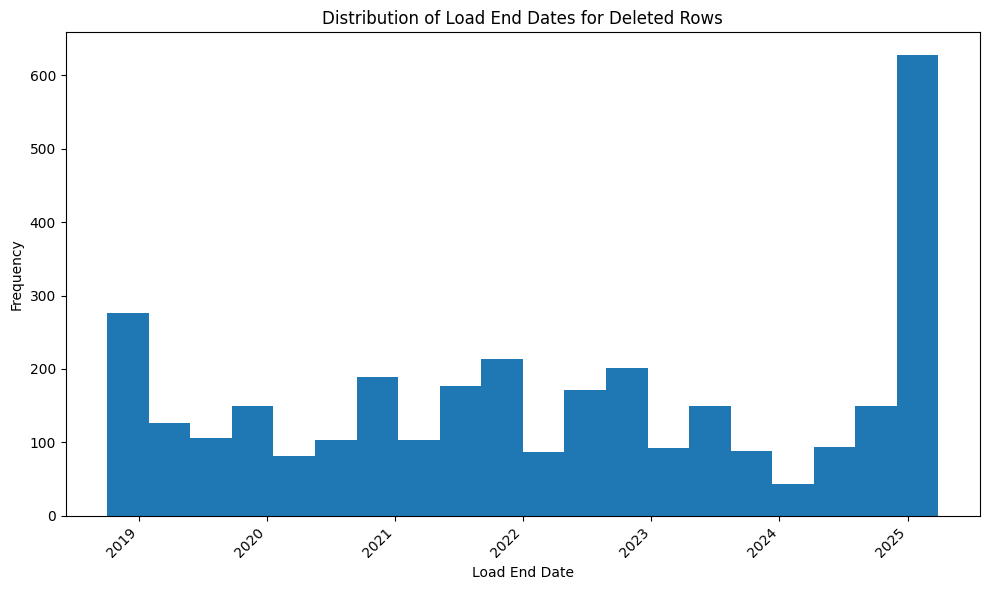

In [ ]:
# Convert 'load_end_date' to datetime if it's not already
missing_rows['load_end_date'] = pd.to_datetime(missing_rows['load_end_date'])

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(missing_rows['load_end_date'], bins=20)
plt.title('Distribution of Load End Dates for Deleted Rows')
plt.xlabel('Load End Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As expected, a big proportion of the filtered values are from the time frame filtering - we want to keep observations within the 2019-2024 time frame. Otherwise, we have deleted a fairly uniform number of transits throughout the period.

In [ ]:
# Create a copy of Bulk_PA
Bulk_PA_copy = Bulk_PA.copy()

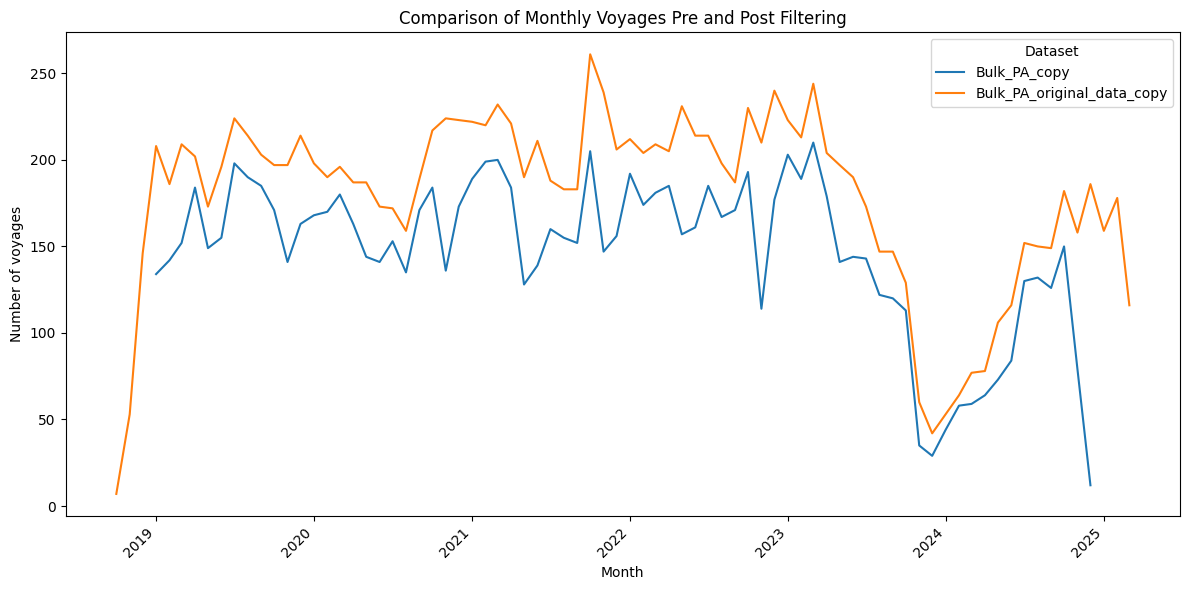

In [ ]:
# Create a month column based on load_end_date for both df
Bulk_PA_copy['month'] = Bulk_PA_copy['load_end_date'].dt.to_period('M')
Bulk_PA_original_data['month'] = Bulk_PA_original_data['load_end_date'].dt.to_period('M')

# Group by load_end_date and count occurrences for Bulk_PA
bulk_pa_counts = Bulk_PA_copy.groupby('month')['month'].count().reset_index(name='count')

# Group by load_end_date and count occurrences for Bulk_PA_original_data
bulk_pa_original_counts = Bulk_PA_original_data.groupby('month')['month'].count().reset_index(name='count')

# Convert 'month' to timestamp before concatenating
bulk_pa_counts['month'] = bulk_pa_counts['month'].dt.to_timestamp()
bulk_pa_original_counts['month'] = bulk_pa_original_counts['month'].dt.to_timestamp()

# Combine the two DataFrames
combined_counts = pd.concat([
    bulk_pa_counts.assign(dataset='Bulk_PA_copy'),
    bulk_pa_original_counts.assign(dataset='Bulk_PA_original_data_copy')
])

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='count', hue='dataset', data=combined_counts)
plt.title('Comparison of Monthly Voyages Pre and Post Filtering')
plt.xlabel('Month')
plt.ylabel('Number of voyages')
plt.legend(title='Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()